# 라이브러리

In [268]:
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

import statsmodels.api as sm  # 로지스틱함수
import scipy.stats as spst    # 카이제곱검정

# 데이터 불러오기

In [269]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [270]:
# 데이터 상위 5줄 출력
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [271]:
# 총 81개의 변수와 1460개의 데이터
print(data.shape)

(1460, 81)


# 데이터 전처리

In [272]:
# 데이터 정보 출력
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### 전체 결측치 확인

In [253]:
data_na = data.isna().sum()
print(data_na[data_na>0])

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


### 65 ~ : 결측치 확인

In [254]:
col = ['PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']

In [255]:
data[col].isna().sum()

PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeature      1406
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64

### 결측치 채우기
- PoolQC(수영장) / Fence(울타리) / MiscFeature(기타기능)이 없음 
- NA -> 'NO'로 결측치 채우기

In [256]:
data['PoolQC'].fillna('NO', inplace=True)
data['Fence'].fillna('NO', inplace=True)
data['MiscFeature'].fillna('NO', inplace=True)

### 결측치 확인하기

In [257]:
data[col].isna().sum()

PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
PoolQC           0
Fence            0
MiscFeature      0
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

In [237]:
data[col].describe()

,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# 단변량 - 숫자형 (8개)

- 0. target = 'SalePrice' : 포장된 진입로
- 2. WoodDeckSF : 목재 데크 공간, 피트
- 3. OpenPorchSF : 오픈 현관 공간, 피트
- 4. EnclosedPorch : 밀폐된 현관 공간, 피트
- 5. 3SsnPorch : 3계절 현관 공간, 피트
- 6. ScreenPorch : 스크린 현관 공간, 피트
- 7. PoolArea : 수영장 공간, 피트
- 11. MiscVal : 기타기능

### 0. target = 'SalePrice'
- 부동산의 판매 가격 (달러)

In [238]:
target = 'SalePrice'

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


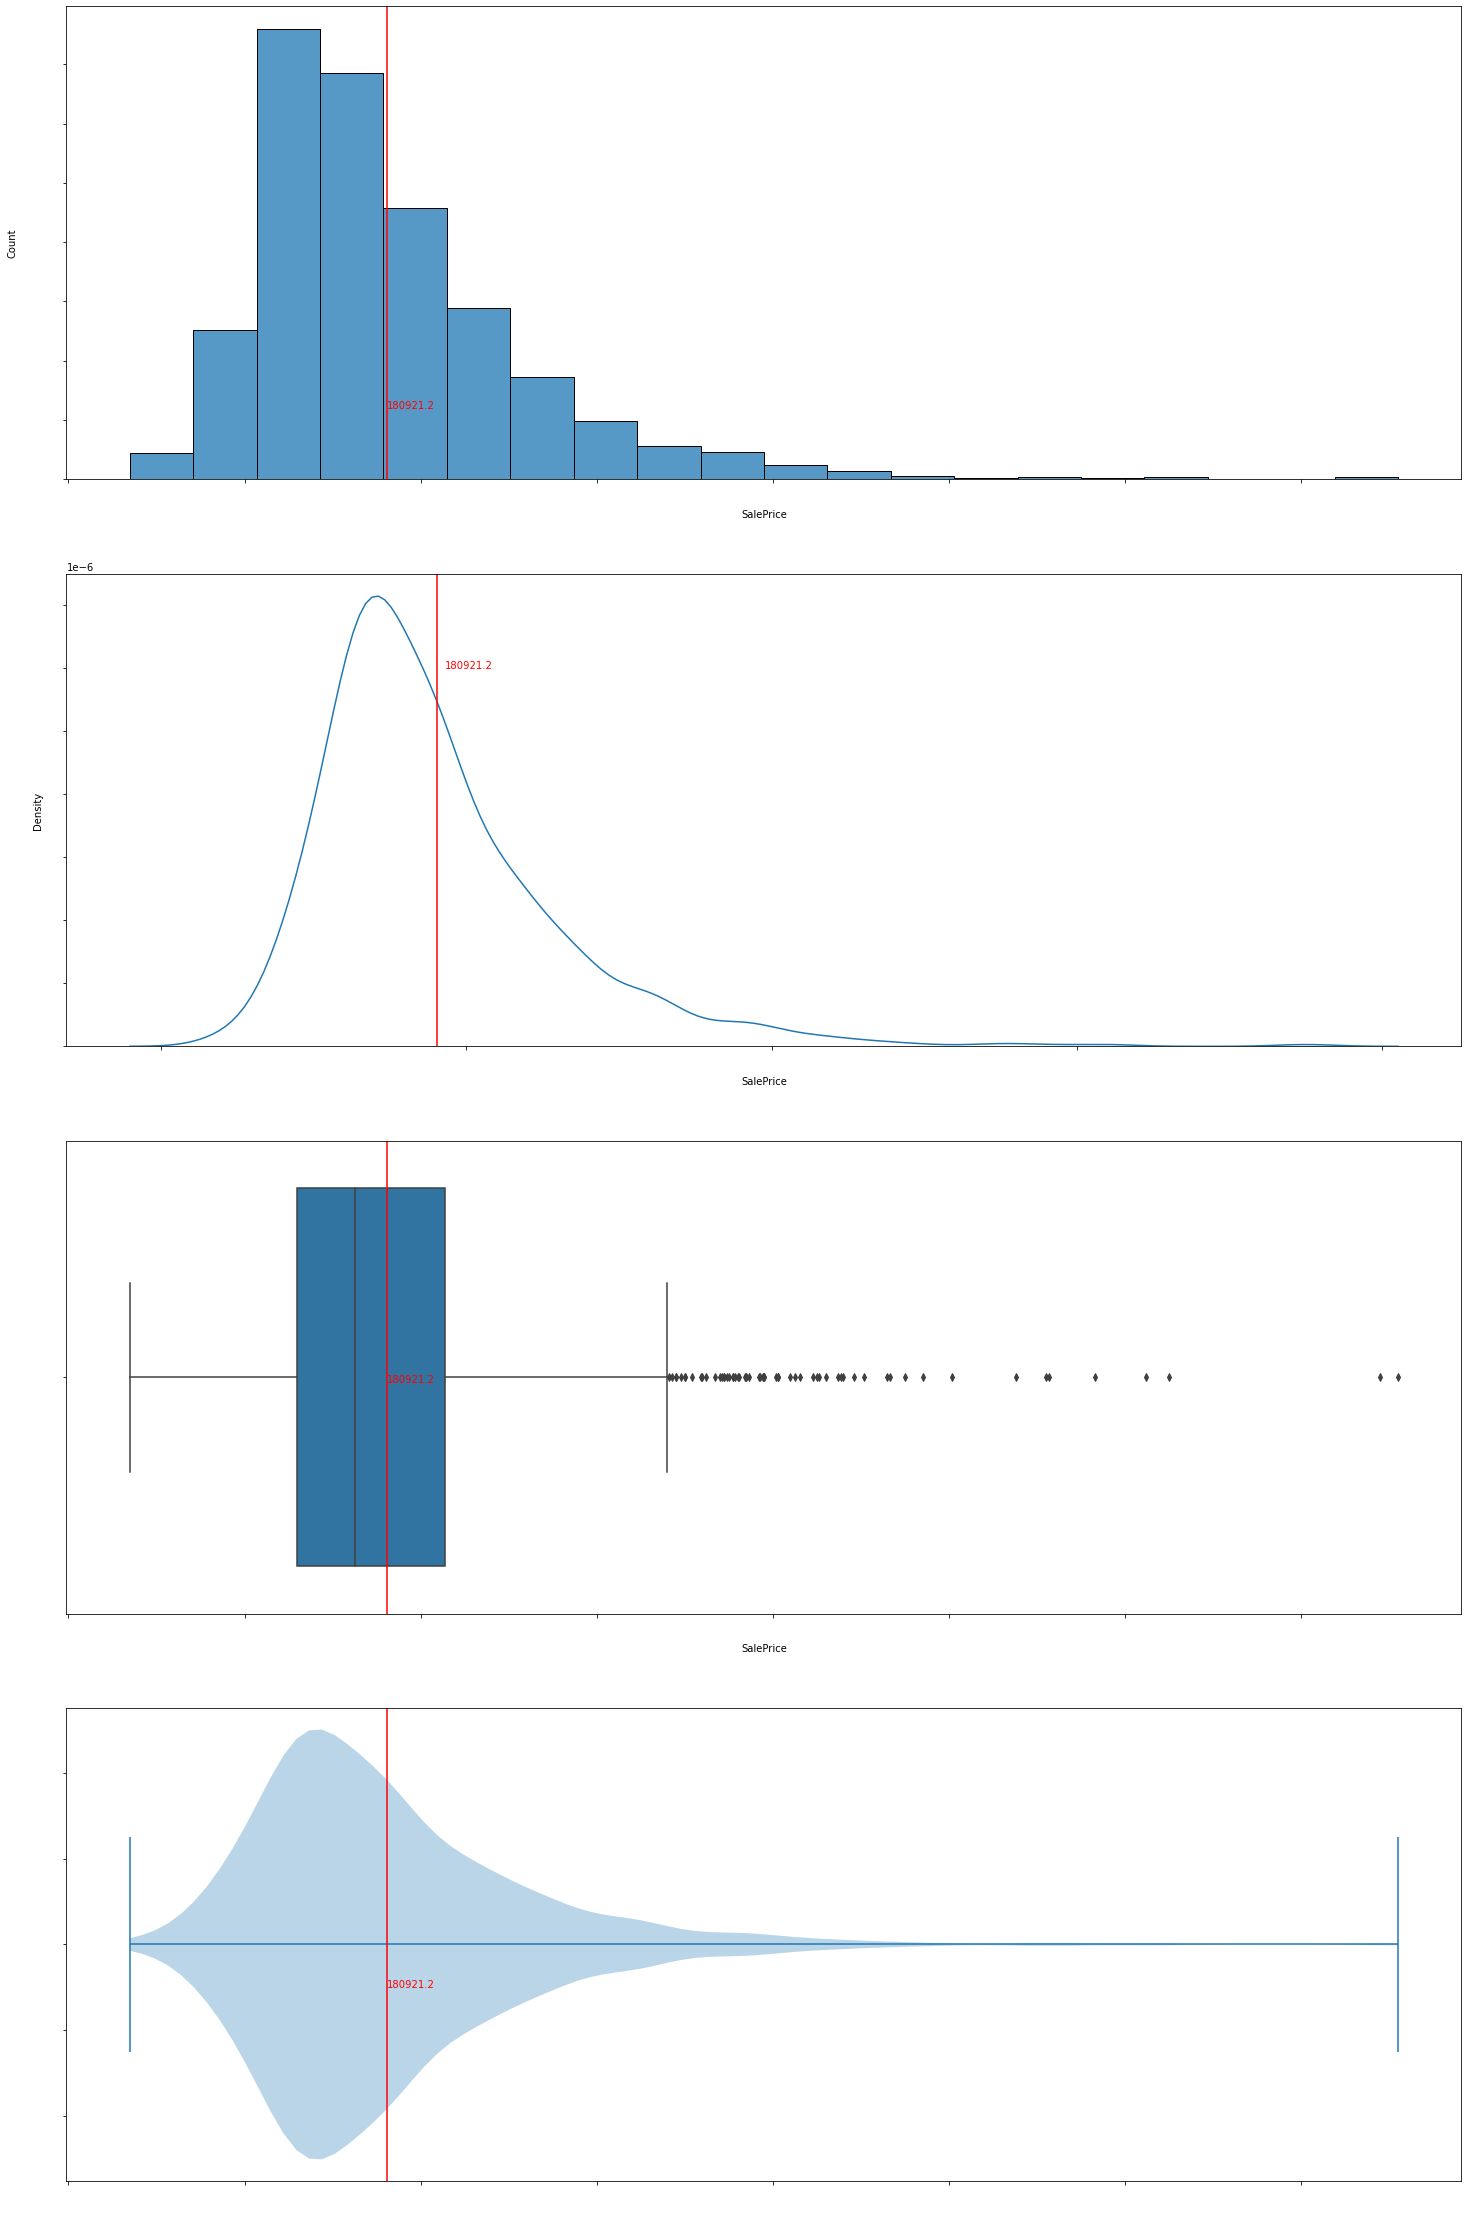

In [239]:
plt.figure(figsize = (25, 40))
var_m = np.mean(data[target])

plt.subplot(4, 1, 1)
sns.histplot(data[target], bins = 20)
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 0.5, 60, round(var_m, 2), color='r')
plt.xticks(color='w', size=20) 
plt.yticks(color='w', size=20) 
# plt.text(var_m + 0.1, 0.8, round(var_m, 2), color='r')

plt.subplot(4, 1, 2)
sns.kdeplot(data[target])
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 5000, 6e-6, round(var_m, 2), color='r')
plt.xticks(color='w', size=20) 
plt.yticks(color='w', size=20) 

plt.subplot(4, 1, 3)
sns.boxplot(data[target])
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 0.5, 0.01, round(var_m, 2), color='r')
plt.xticks(color='w', size=20) 
plt.yticks(color='w', size=20) 

plt.subplot(4, 1, 4)
plt.violinplot(data[target], vert = False, showmeans = False)
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 0.5, 0.95, round(var_m, 2), color='r')
plt.xticks(color='w', size=20) 
plt.yticks(color='w', size=20) 

plt.show()

In [240]:
data[target].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [241]:
data[target].value_counts()

140000    20
135000    17
155000    14
145000    14
190000    13
          ..
337000     1
412500     1
306000     1
195400     1
206000     1
Name: SalePrice, Length: 663, dtype: int64

- 왼쪽으로 치우친 그래프 양상 (최빈값: 140000달러 < 평균: 180921 달러 < 중간값: 163000) 
- 이상치가 있음
- 부동산의 판매가격이 어느 부분에 높은 이유를 볼 때 많이 선호하거나 판매되는 가격이 있거나 <br>
법적으로 정해진 부분이 있는 건 아닐까 생각함

### 2. WoodDeckSF 
- 평방 피트의 목재 데크 영역 (목재 데크 면적, 평방 피트)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


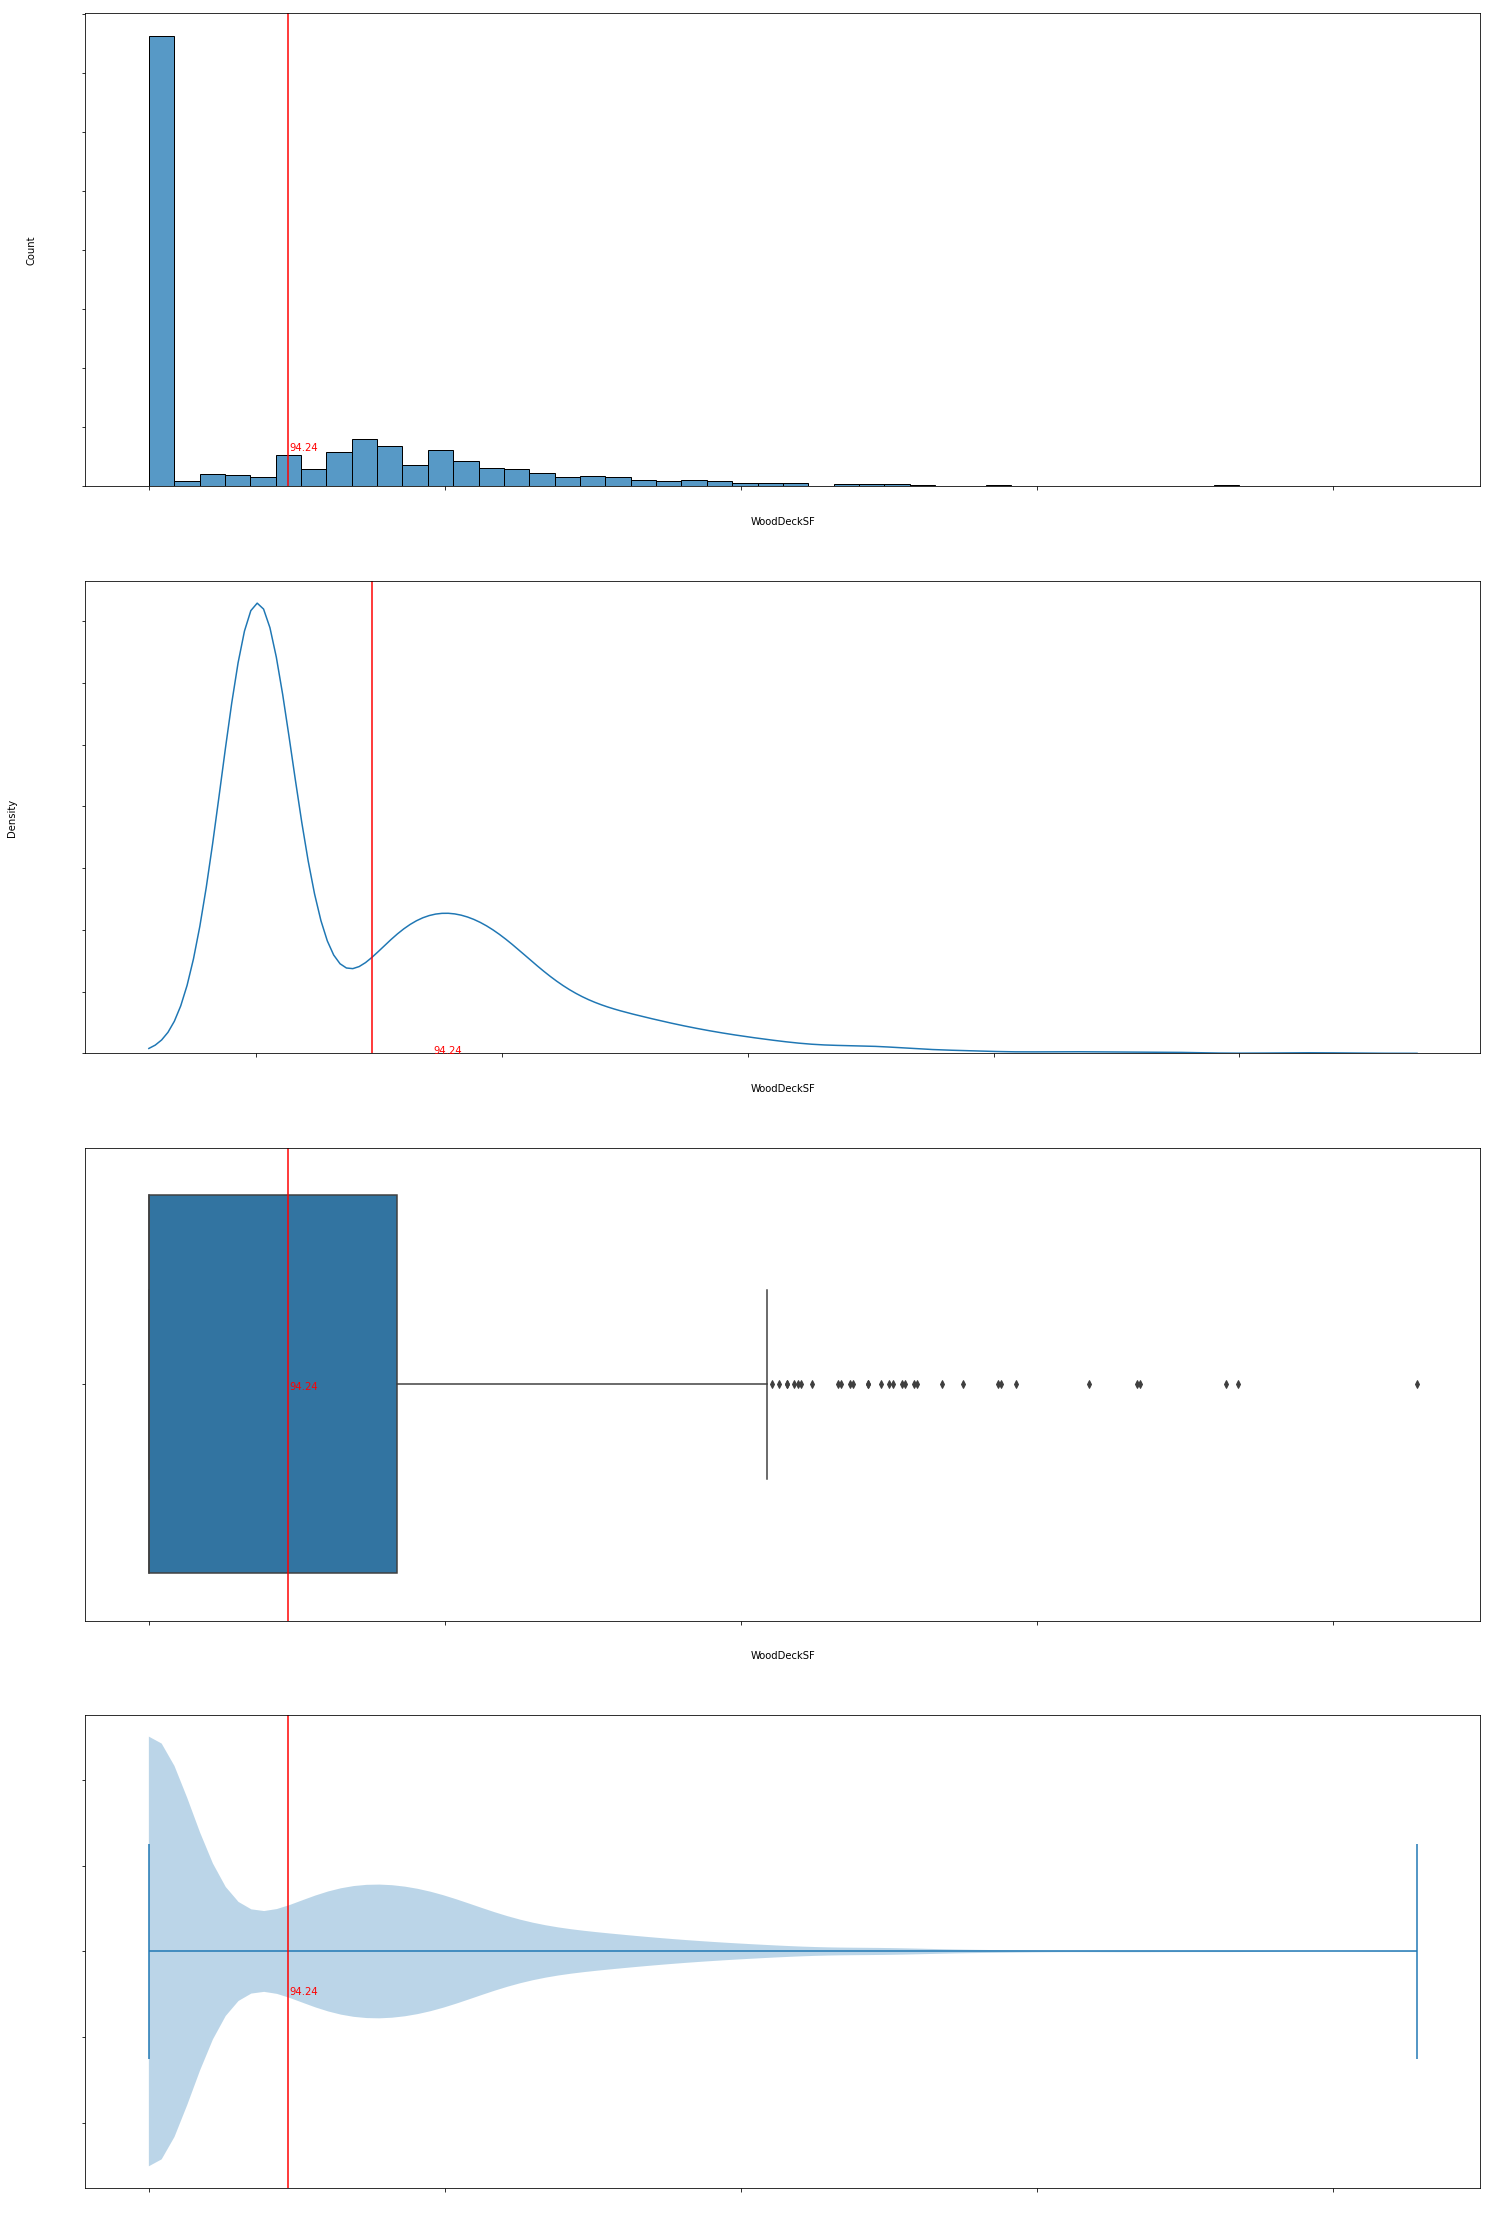

In [242]:
plt.figure(figsize = (25, 40))
var_m = np.mean(data['WoodDeckSF'])

plt.subplot(4, 1, 1)
sns.histplot(data['WoodDeckSF'], bins = 50)
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 0.5, 60, round(var_m, 2), color='r')
# plt.text(var_m + 0.1, 0.8, round(var_m, 2), color='r')
plt.xticks(color='w', size=20) 
plt.yticks(color='w', size=20) 

plt.subplot(4, 1, 2)
sns.kdeplot(data['WoodDeckSF'])
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 50, 6e-6, round(var_m, 2), color='r')
plt.xticks(color='w', size=20) 
plt.yticks(color='w', size=20) 

plt.subplot(4, 1, 3)
sns.boxplot(data['WoodDeckSF'])
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 0.5, 0.01, round(var_m, 2), color='r')
plt.xticks(color='w', size=20) 
plt.yticks(color='w', size=20) 

plt.subplot(4, 1, 4)
plt.violinplot(data['WoodDeckSF'], vert = False, showmeans = False)
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 0.5, 0.95, round(var_m, 2), color='r')
plt.xticks(color='w', size=20) 
plt.yticks(color='w', size=20) 

plt.show()

In [158]:
data['WoodDeckSF'].describe()

count    1460.000000
mean       94.244521
std       125.338794
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max       857.000000
Name: WoodDeckSF, dtype: float64

In [159]:
data['WoodDeckSF'].value_counts()

0      761
192     38
100     36
144     33
120     31
      ... 
103      1
269      1
98       1
97       1
857      1
Name: WoodDeckSF, Length: 274, dtype: int64

In [19]:
# 이상치 제거
data = data[data['WoodDeckSF']<800]

- 이상치가 존재함
- 편방피트 0은 목재 데크 영역이 존재하지 않을 것으로 생각함
- 0의 비중이 큰 만큼 이를 제외하고 분석하거나 <br>
존재한다(699)/하지 않는다(761)로 나누어 추가 분석을 할 수 있을 것으로 보인다.

### 3. OpenPorchSF
- 평방 피트의 오픈 베란다 공간 (오픈 베란다 영역, 평방 피트)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


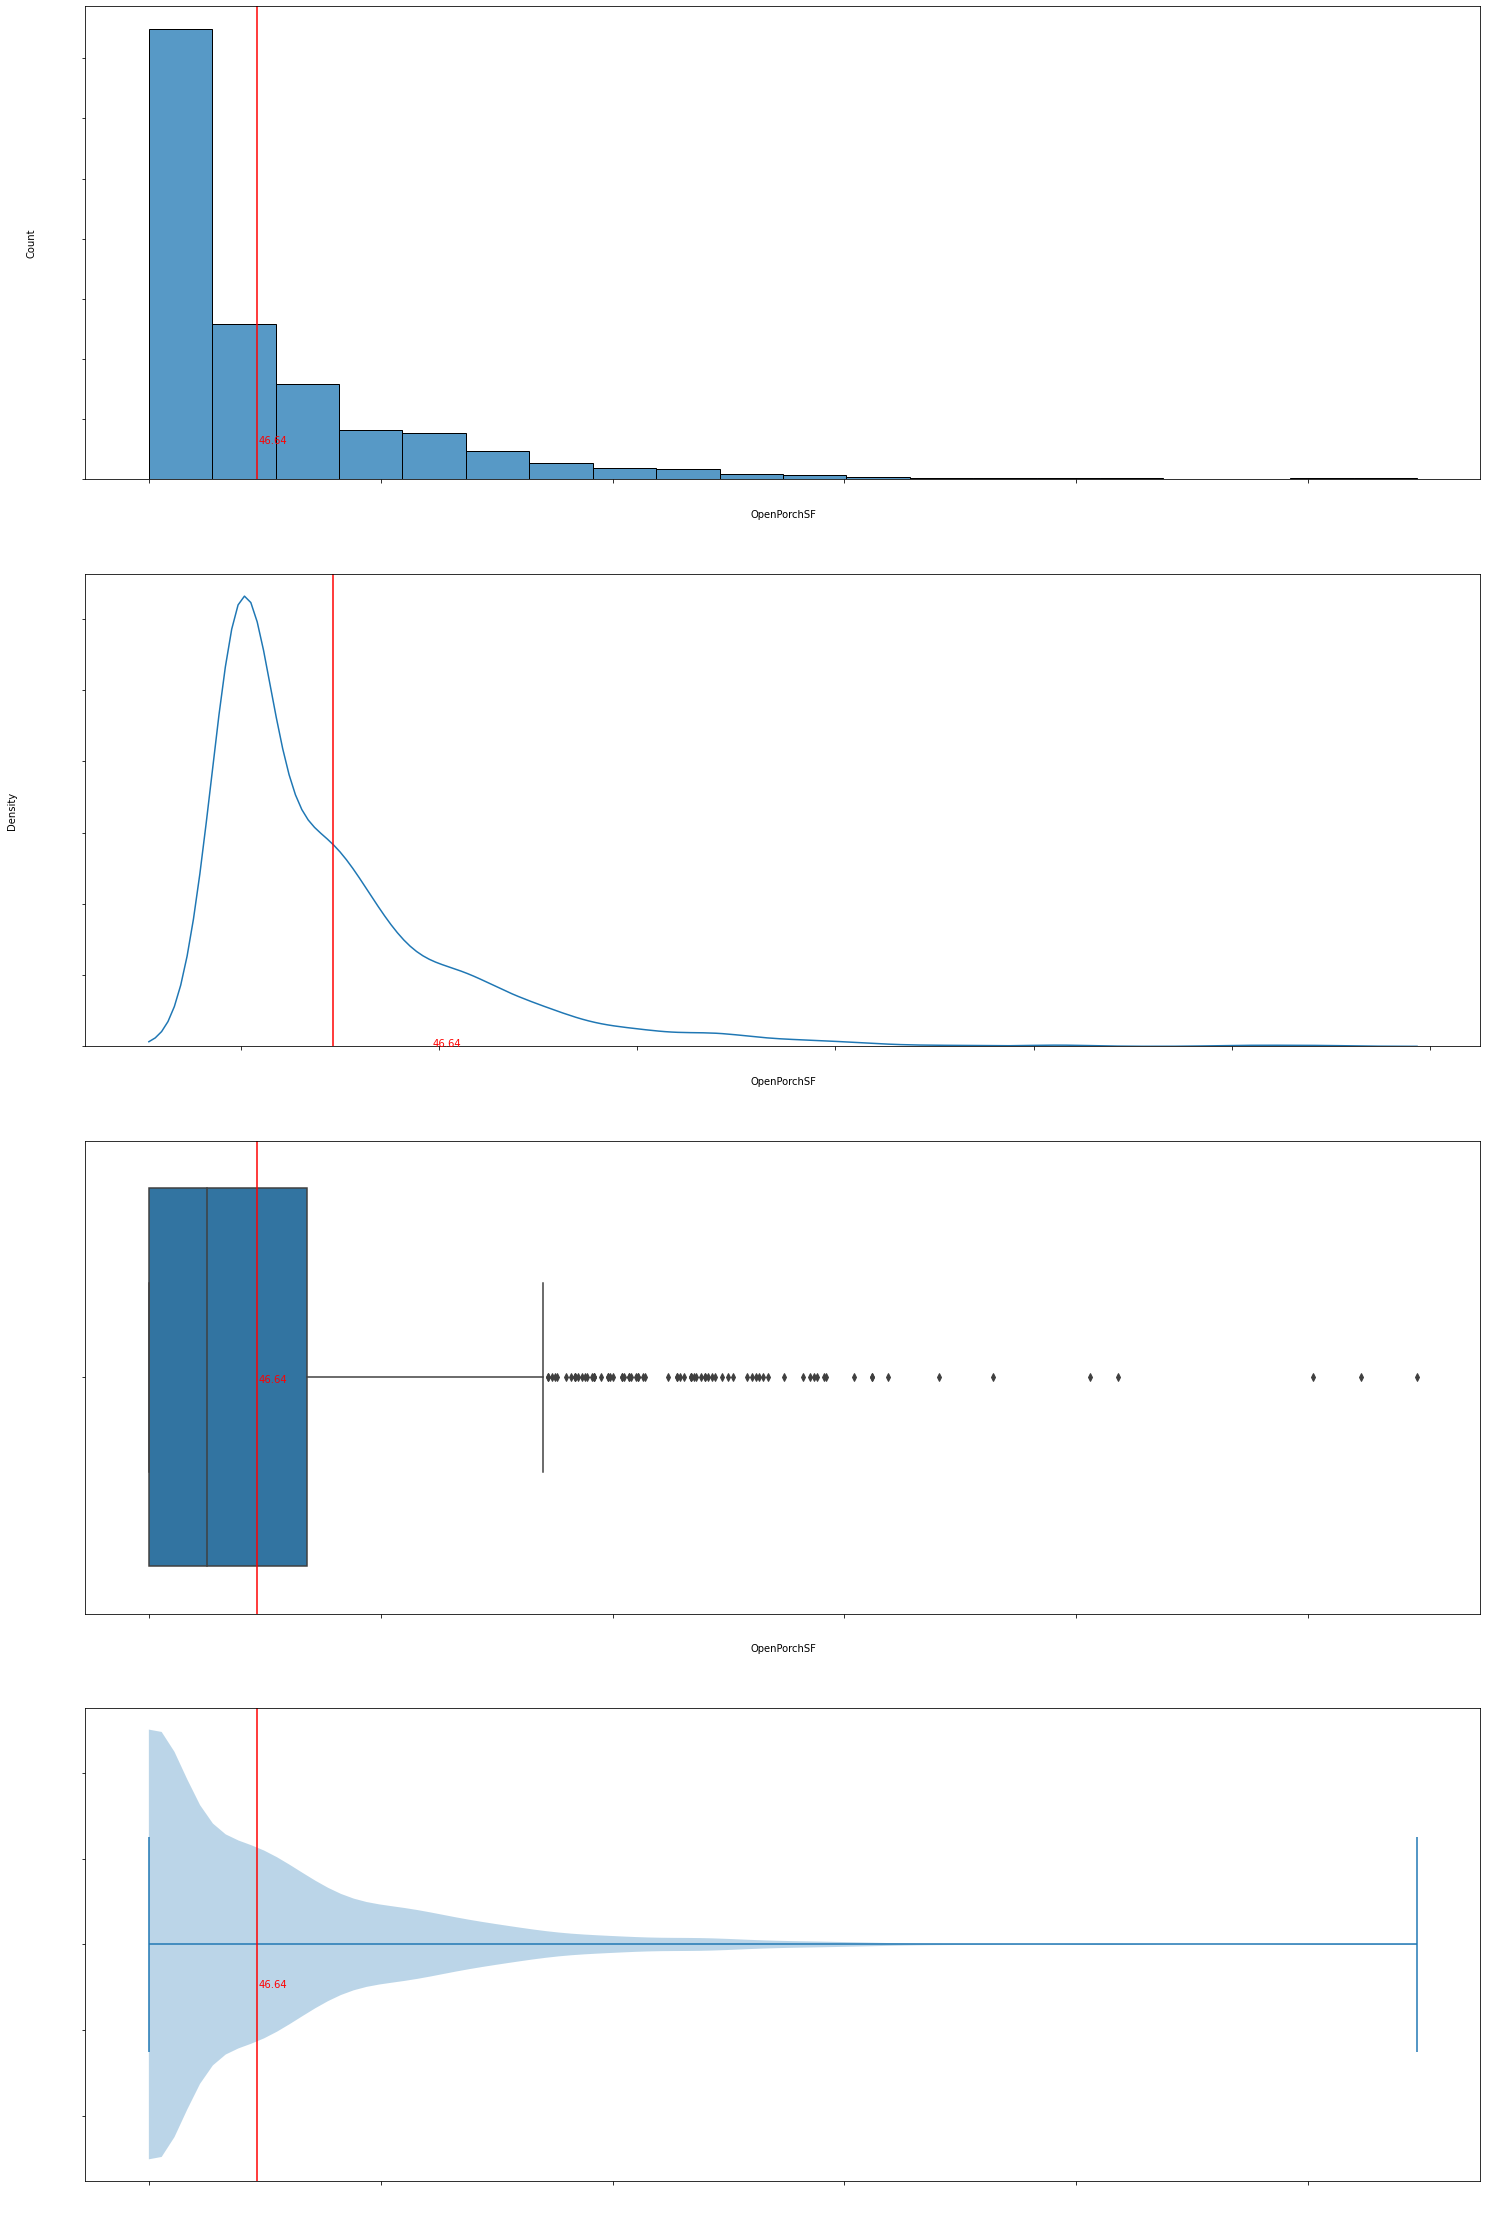

In [20]:
plt.figure(figsize = (25, 40))
var_m = np.mean(data['OpenPorchSF'])

plt.subplot(4, 1, 1)
sns.histplot(data['OpenPorchSF'], bins = 20)
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 0.5, 60, round(var_m, 2), color='r')
# plt.text(var_m + 0.1, 0.8, round(var_m, 2), color='r')
plt.xticks(color='w', size=20) 
plt.yticks(color='w', size=20) 

plt.subplot(4, 1, 2)
sns.kdeplot(data['OpenPorchSF'])
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 50, 6e-6, round(var_m, 2), color='r')
plt.xticks(color='w', size=20) 
plt.yticks(color='w', size=20) 

plt.subplot(4, 1, 3)
sns.boxplot(data['OpenPorchSF'])
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 0.5, 0.01, round(var_m, 2), color='r')
plt.xticks(color='w', size=20) 
plt.yticks(color='w', size=20) 

plt.subplot(4, 1, 4)
plt.violinplot(data['OpenPorchSF'], vert = False, showmeans = False)
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 0.5, 0.95, round(var_m, 2), color='r')
plt.xticks(color='w', size=20) 
plt.yticks(color='w', size=20) 

plt.show()

In [21]:
data['OpenPorchSF'].describe()

count    1459.000000
mean       46.642906
std        66.275421
min         0.000000
25%         0.000000
50%        25.000000
75%        68.000000
max       547.000000
Name: OpenPorchSF, dtype: float64

In [22]:
data['OpenPorchSF'].value_counts()

0      656
36      29
48      22
20      21
45      19
      ... 
141      1
137      1
135      1
134      1
547      1
Name: OpenPorchSF, Length: 202, dtype: int64

In [23]:
# 이상치 제거
data = data[data['OpenPorchSF']<500]

- 왼쪽으로 치우친 그래프 양상 (최빈값: 25피트 = 중간값: 25피트 < 평균: 46 피트)
- 이상치가 존재함 
- 편방피트 0은 오픈 베란다 공간이 존재하지 않을 것으로 생각함
- 0의 비중이 큰 만큼 이를 제외하고 분석하거나 <br>
존재한다(804)/하지 않는다(656)로 나누어 추가 분석을 할 수 있을 것으로 보인다.

### 4. EnclosedPorch 
- 평방 피트의 밀폐된 현관 공간 (밀폐된 현관 면적, 평방 피트)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


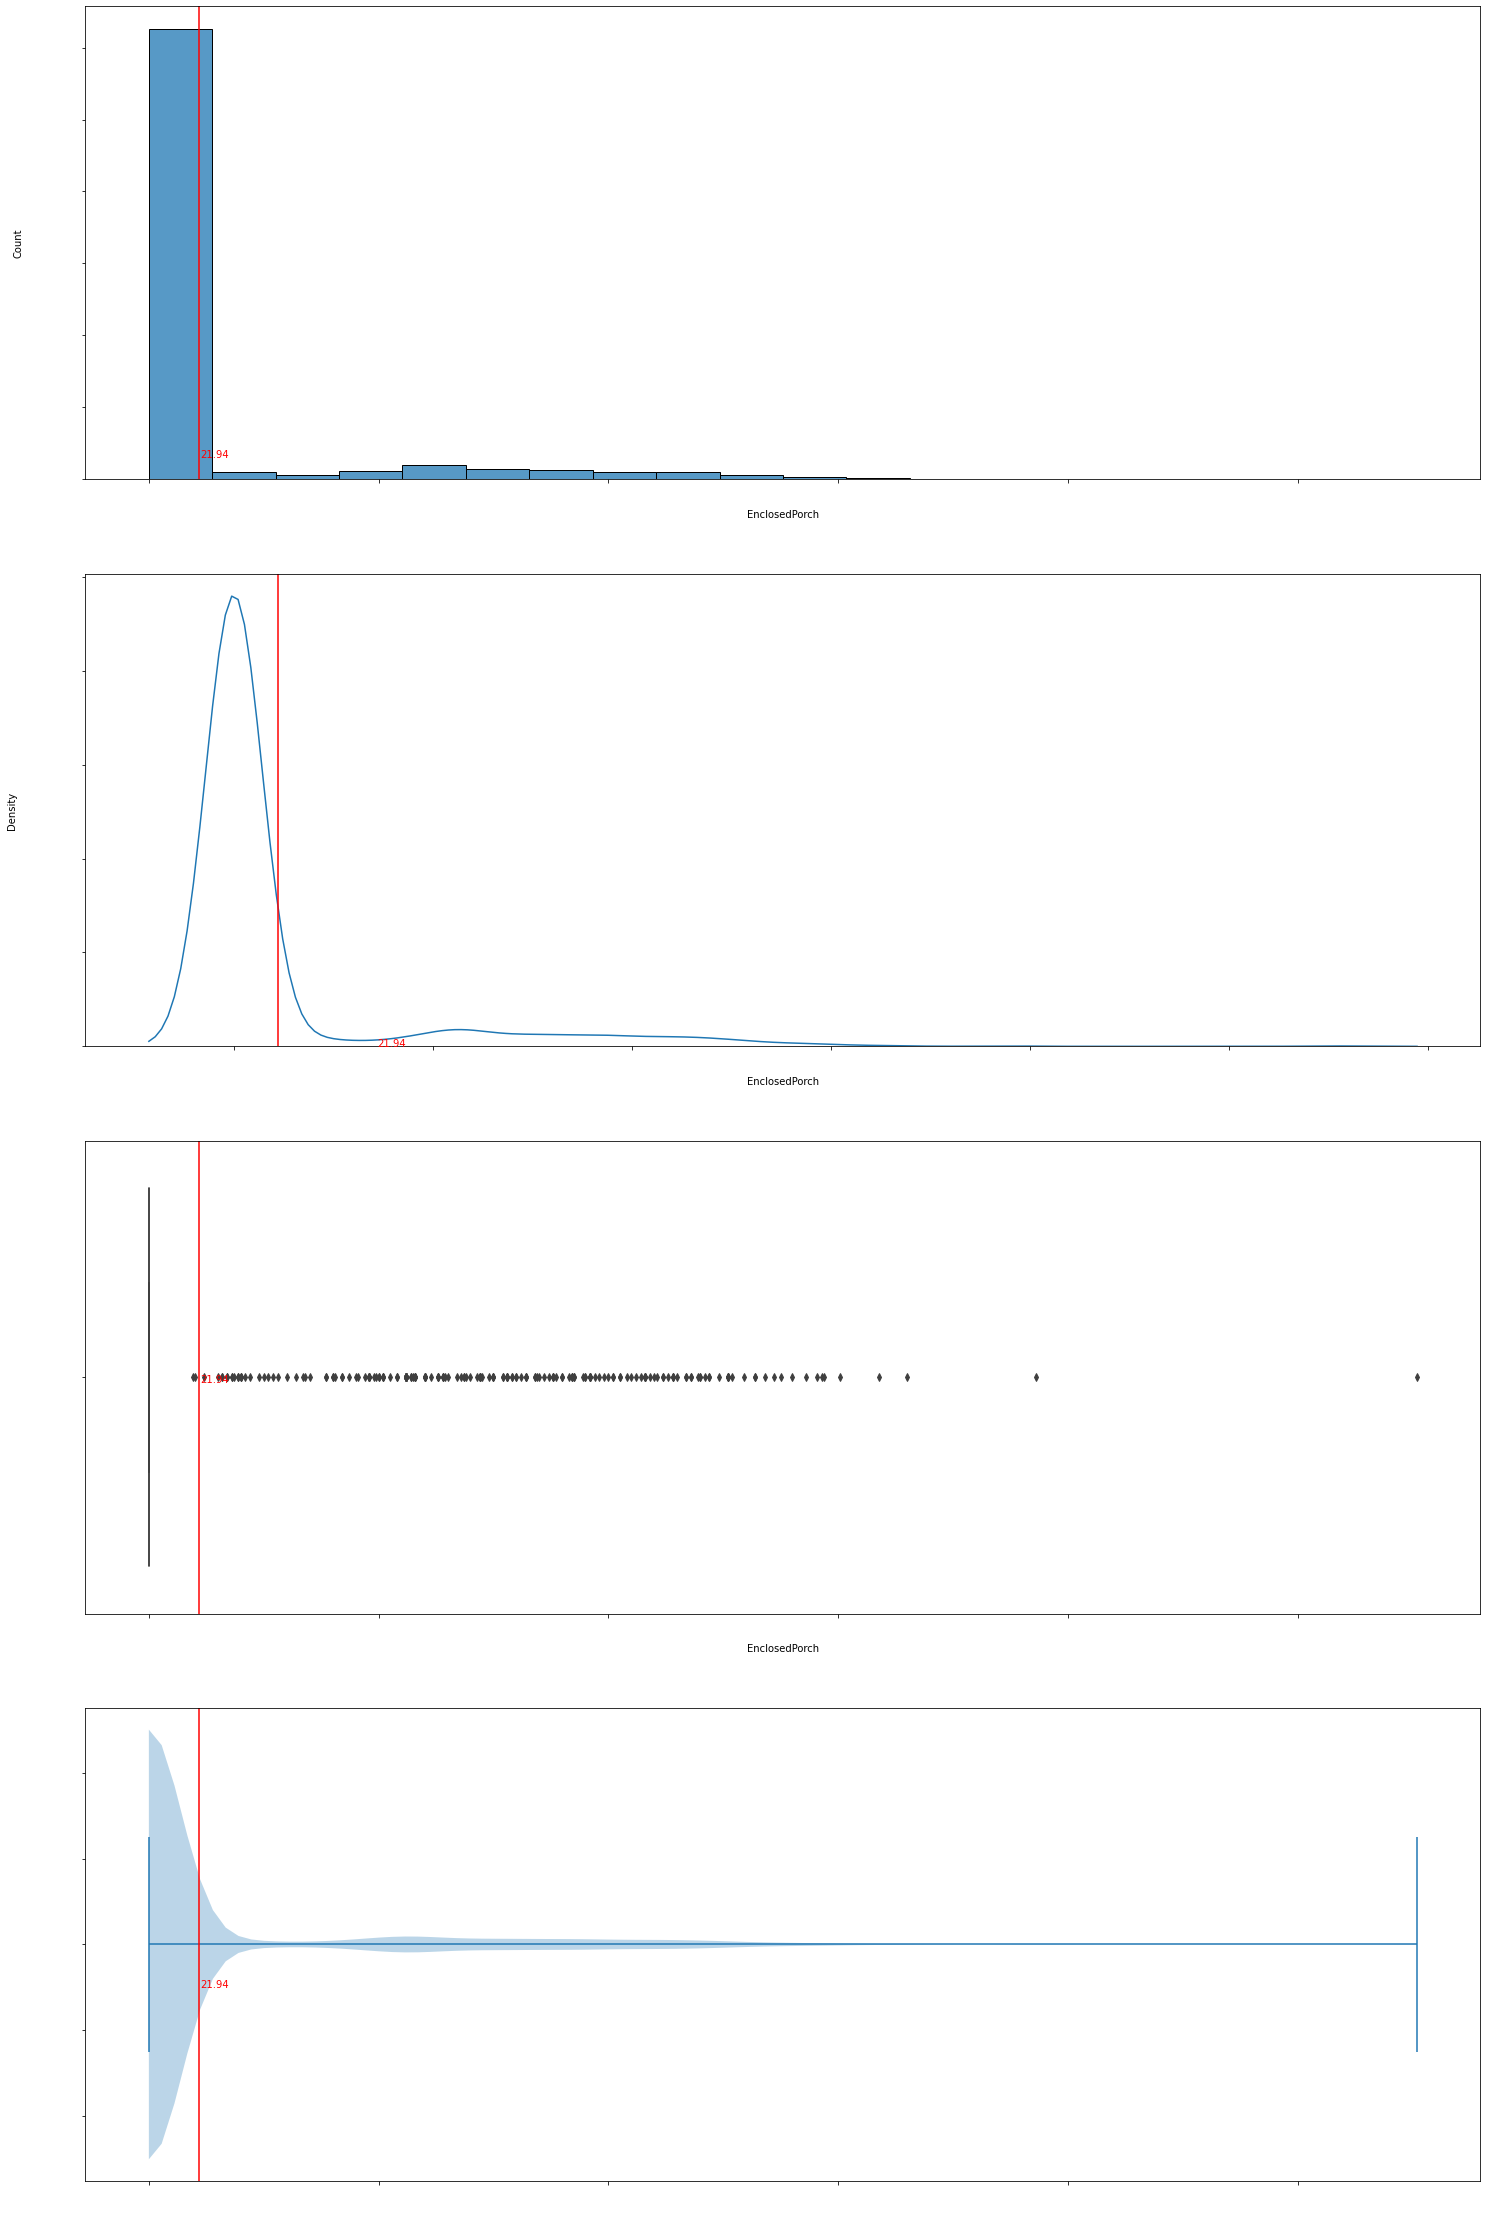

In [24]:
plt.figure(figsize = (25, 40))
var_m = np.mean(data['EnclosedPorch'])

plt.subplot(4, 1, 1)
sns.histplot(data['EnclosedPorch'], bins = 20)
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 0.5, 60, round(var_m, 2), color='r')
# plt.text(var_m + 0.1, 0.8, round(var_m, 2), color='r')
plt.xticks(color='w', size=20) 
plt.yticks(color='w', size=20) 

plt.subplot(4, 1, 2)
sns.kdeplot(data['EnclosedPorch'])
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 50, 6e-6, round(var_m, 2), color='r')
plt.xticks(color='w', size=20) 
plt.yticks(color='w', size=20) 

plt.subplot(4, 1, 3)
sns.boxplot(data['EnclosedPorch'])
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 0.5, 0.01, round(var_m, 2), color='r')
plt.xticks(color='w', size=20) 
plt.yticks(color='w', size=20) 

plt.subplot(4, 1, 4)
plt.violinplot(data['EnclosedPorch'], vert = False, showmeans = False)
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 0.5, 0.95, round(var_m, 2), color='r')
plt.xticks(color='w', size=20) 
plt.yticks(color='w', size=20) 

plt.show()

In [25]:
data['EnclosedPorch'].describe()

count    1456.000000
mean       21.935440
std        61.146345
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       552.000000
Name: EnclosedPorch, dtype: float64

In [26]:
data['EnclosedPorch'].value_counts()

0      1249
112      15
96        6
120       5
144       5
       ... 
169       1
67        1
68        1
162       1
552       1
Name: EnclosedPorch, Length: 120, dtype: int64

In [27]:
# 이상치 제거
data = data[data['EnclosedPorch']<500]

- 이상치가 존재함
- 편방피트 0은 밀폐된 현관 공간이 존재하지 않을 것으로 생각함
- 0의 비중이 큰 만큼 이를 제외하고 분석하거나 <br>
존재한다(208)/하지 않는다(1252)로 나누어 추가 분석을 할 수 있을 것으로 보인다.

- 밀폐된 현관 공간을 선호하지 않는 것은 아닐까?

### 5. 3SsnPorch 
- 평방 피트의 3시즌 현관 지역 (3계절 현관 면적, 평방 피트 = 봄, 여름, 가을)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


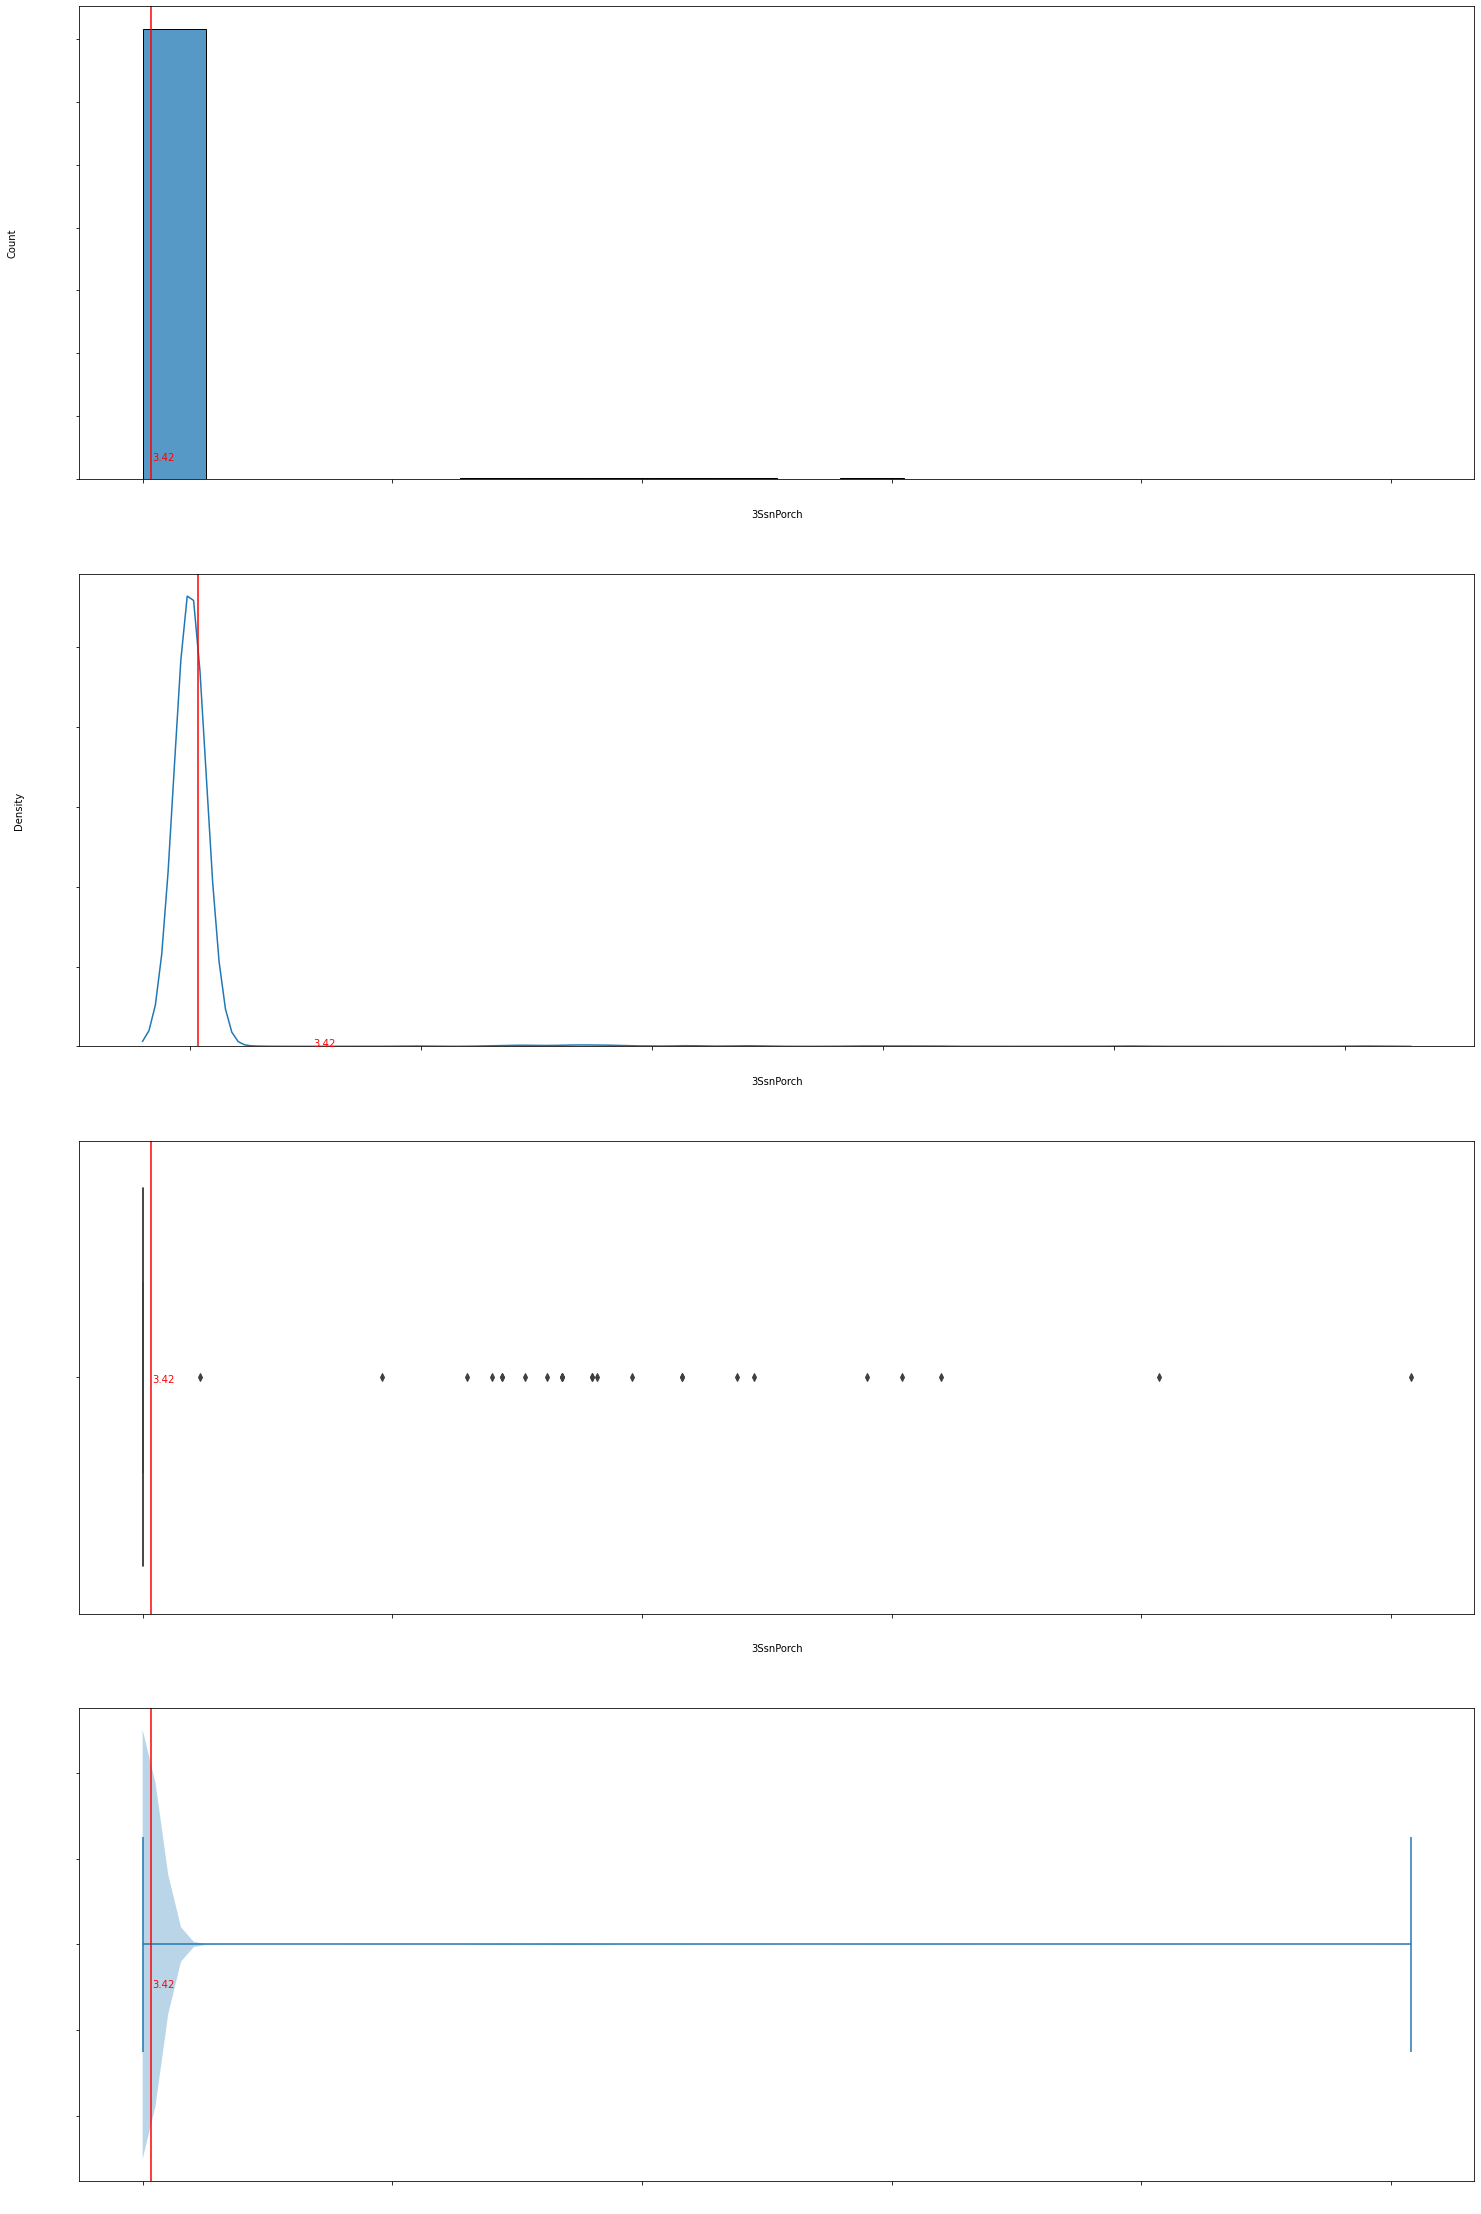

In [28]:
plt.figure(figsize = (25, 40))
var_m = np.mean(data['3SsnPorch'])

plt.subplot(4, 1, 1)
sns.histplot(data['3SsnPorch'], bins = 20)
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 0.5, 60, round(var_m, 2), color='r')
# plt.text(var_m + 0.1, 0.8, round(var_m, 2), color='r')
plt.xticks(color='w', size=20) 
plt.yticks(color='w', size=20) 

plt.subplot(4, 1, 2)
sns.kdeplot(data['3SsnPorch'])
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 50, 6e-6, round(var_m, 2), color='r')
plt.xticks(color='w', size=20) 
plt.yticks(color='w', size=20) 

plt.subplot(4, 1, 3)
sns.boxplot(data['3SsnPorch'])
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 0.5, 0.01, round(var_m, 2), color='r')
plt.xticks(color='w', size=20) 
plt.yticks(color='w', size=20) 

plt.subplot(4, 1, 4)
plt.violinplot(data['3SsnPorch'], vert = False, showmeans = False)
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 0.5, 0.95, round(var_m, 2), color='r')
plt.xticks(color='w', size=20) 
plt.yticks(color='w', size=20) 

plt.show()

In [29]:
data['3SsnPorch'].describe()

count    1455.000000
mean        3.421306
std        29.367012
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3SsnPorch, dtype: float64

In [30]:
data['3SsnPorch'].value_counts()

0      1431
168       3
216       2
144       2
180       2
407       1
320       1
304       1
290       1
245       1
238       1
182       1
196       1
23        1
162       1
153       1
140       1
130       1
96        1
508       1
Name: 3SsnPorch, dtype: int64

In [31]:
# 이상치 제거
data = data[data['3SsnPorch']<500]

- 이상치가 존재함
- 편방피트 0은 (3계절 현관 면적, 평방 피트 = 봄, 여름, 가을)이 존재하지 않을 것으로 생각함
- 0의 비중이 큰 만큼 이를 제외하고 분석하거나 <br>
존재한다(24)/하지 않는다(1436)로 나누어 추가 분석을 할 수 있을 것으로 보인다.

- 3계절 현관 면적을 선호하지 않는 것은 아닐까? 4계절 현관 면적을 선호하는 건 아닐까?
- 4계절 현관 면적에 대한 조사도 필요하다고 생각됨

### 6. ScreenPorch
- 평방 피트의 스크린 베란다 공간 (스크린 현관 면적, 평방 피트)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


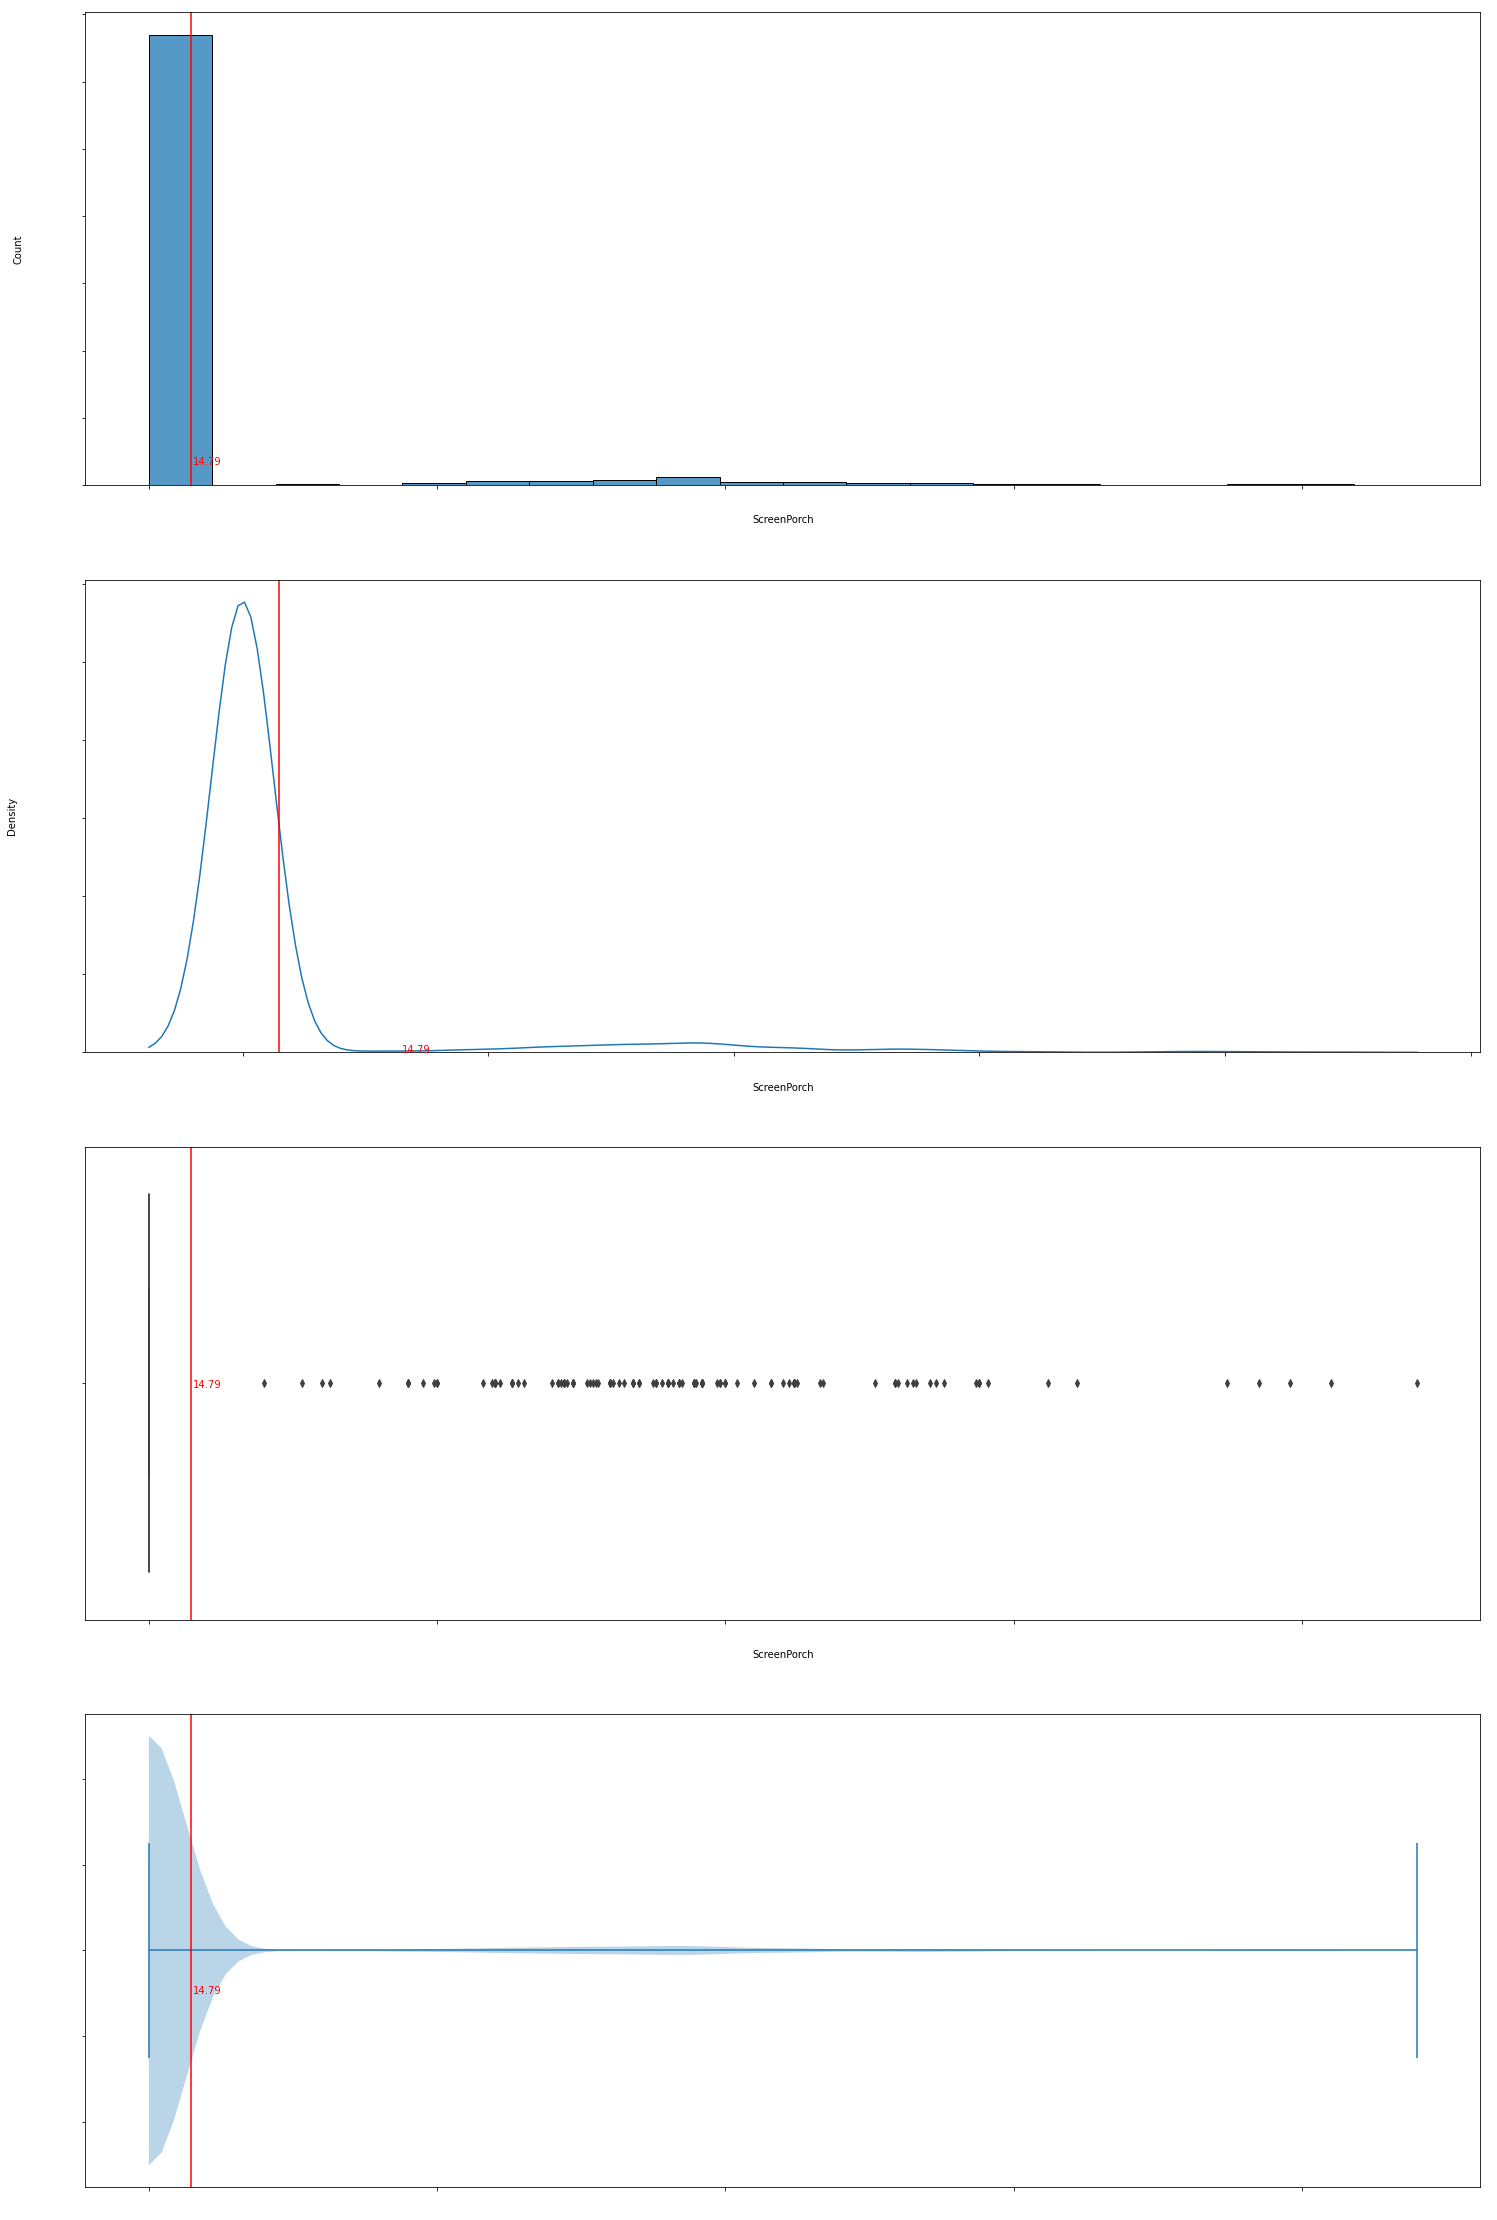

In [32]:
plt.figure(figsize = (25, 40))
var_m = np.mean(data['ScreenPorch'])

plt.subplot(4, 1, 1)
sns.histplot(data['ScreenPorch'], bins = 20)
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 0.5, 60, round(var_m, 2), color='r')
# plt.text(var_m + 0.1, 0.8, round(var_m, 2), color='r')
plt.xticks(color='w', size=20) 
plt.yticks(color='w', size=20) 

plt.subplot(4, 1, 2)
sns.kdeplot(data['ScreenPorch'])
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 50, 6e-6, round(var_m, 2), color='r')
plt.xticks(color='w', size=20) 
plt.yticks(color='w', size=20) 

plt.subplot(4, 1, 3)
sns.boxplot(data['ScreenPorch'])
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 0.5, 0.01, round(var_m, 2), color='r')
plt.xticks(color='w', size=20) 
plt.yticks(color='w', size=20) 

plt.subplot(4, 1, 4)
plt.violinplot(data['ScreenPorch'], vert = False, showmeans = False)
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 0.5, 0.95, round(var_m, 2), color='r')
plt.xticks(color='w', size=20) 
plt.yticks(color='w', size=20) 

plt.show()

In [33]:
data['ScreenPorch'].describe()

count    1454.000000
mean       14.792985
std        54.516979
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       440.000000
Name: ScreenPorch, dtype: float64

In [34]:
data['ScreenPorch'].value_counts()

0      1339
192       6
120       5
224       5
189       4
       ... 
182       1
95        1
63        1
190       1
440       1
Name: ScreenPorch, Length: 75, dtype: int64

- 이상치가 존재함
- 편방피트 0은 스크린 현관 면적이 존재하지 않을 것으로 생각함
- 0의 비중이 큰 만큼 이를 제외하고 분석하거나 <br>
존재한다(116)/하지 않는다(1344)로 나누어 추가 분석을 할 수 있을 것으로 보인다.
- 스크린 베란다 공간을 선호하지 않는 것은 아닐까?

### 7. PoolArea
- 평방 피트의 수영장 공간 (수영장 면적, 평방 피트)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


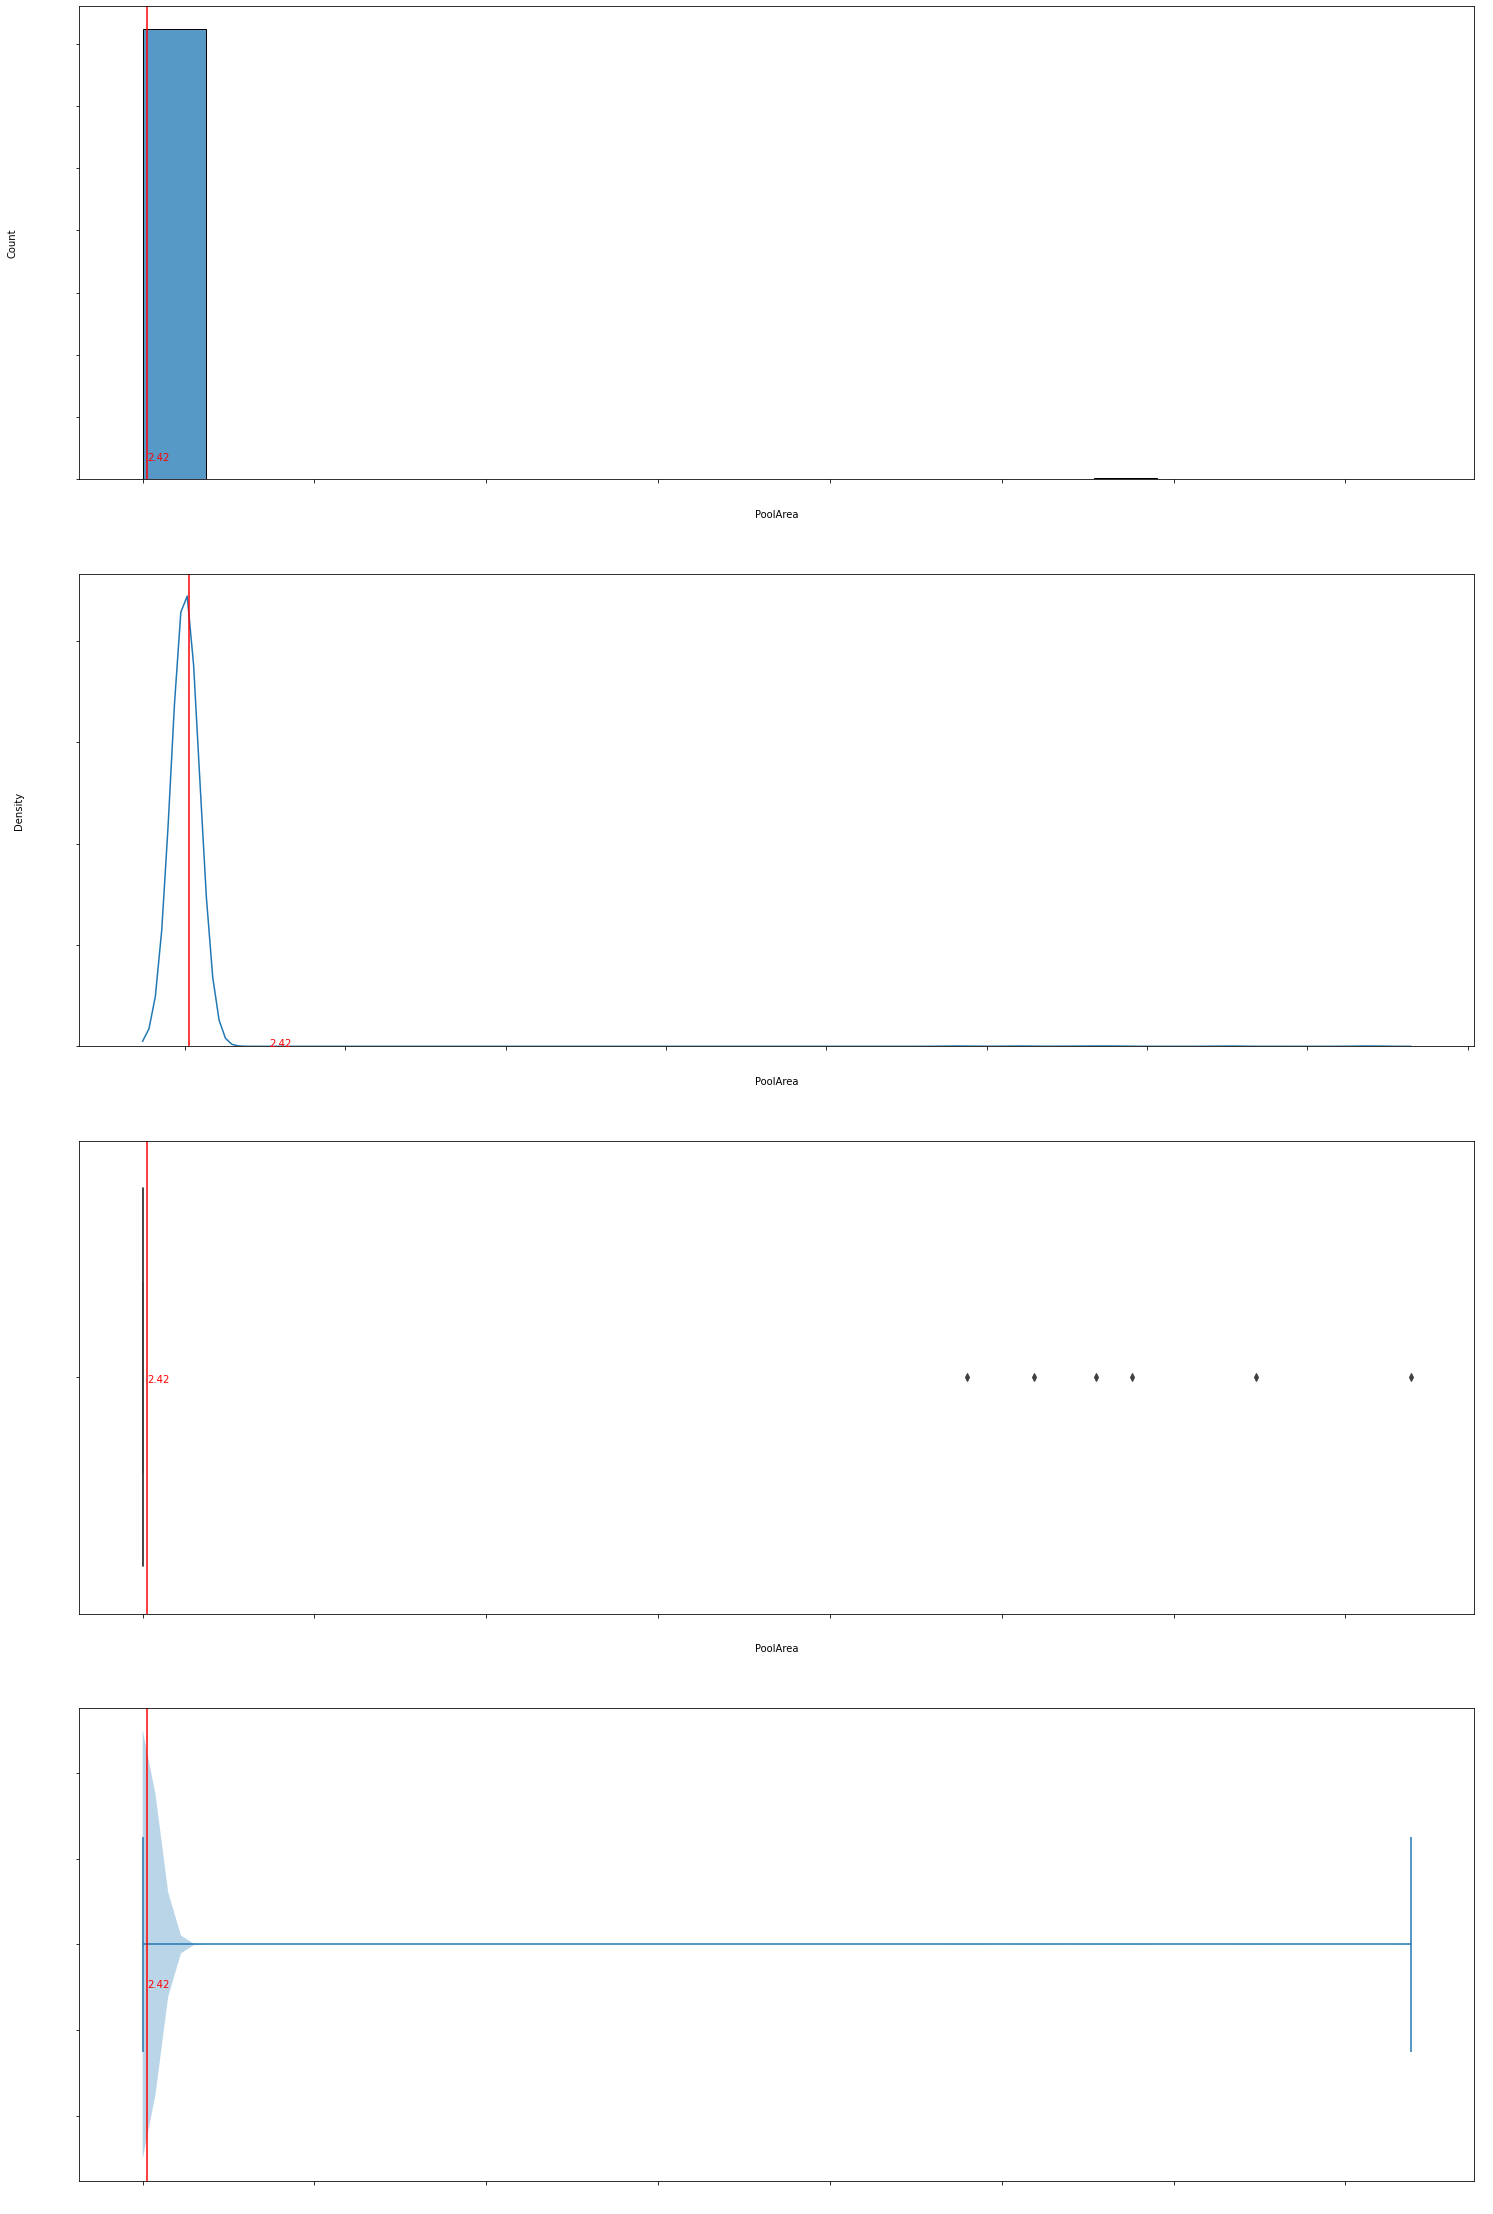

In [35]:
plt.figure(figsize = (25, 40))
var_m = np.mean(data['PoolArea'])

plt.subplot(4, 1, 1)
sns.histplot(data['PoolArea'], bins = 20)
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 0.5, 60, round(var_m, 2), color='r')
# plt.text(var_m + 0.1, 0.8, round(var_m, 2), color='r')
plt.xticks(color='w', size=20) 
plt.yticks(color='w', size=20) 

plt.subplot(4, 1, 2)
sns.kdeplot(data['PoolArea'])
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 50, 6e-6, round(var_m, 2), color='r')
plt.xticks(color='w', size=20) 
plt.yticks(color='w', size=20) 

plt.subplot(4, 1, 3)
sns.boxplot(data['PoolArea'])
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 0.5, 0.01, round(var_m, 2), color='r')
plt.xticks(color='w', size=20) 
plt.yticks(color='w', size=20) 

plt.subplot(4, 1, 4)
plt.violinplot(data['PoolArea'], vert = False, showmeans = False)
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 0.5, 0.95, round(var_m, 2), color='r')
plt.xticks(color='w', size=20) 
plt.yticks(color='w', size=20) 

plt.show()

In [36]:
data['PoolArea'].describe()

count    1454.000000
mean        2.418157
std        37.977134
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64

In [37]:
data['PoolArea'].value_counts()

0      1448
480       1
519       1
555       1
576       1
648       1
738       1
Name: PoolArea, dtype: int64

- 이상치가 존재함
- 편방피트 0은 수영장 공간이 존재하지 않을 것으로 생각함
- 0의 비중이 큰 만큼 이를 제외하고 분석하거나 <br>
존재한다(7)/하지 않는다(1453)로 나누어 추가 분석을 할 수 있을 것으로 보인다.
- 수영장 공간을 선호하지 않는 것은 아닐까? (생각해보니 건축 비용 문제일수도)

### 11. MiscVal
- 기타 기능 값 (달러)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


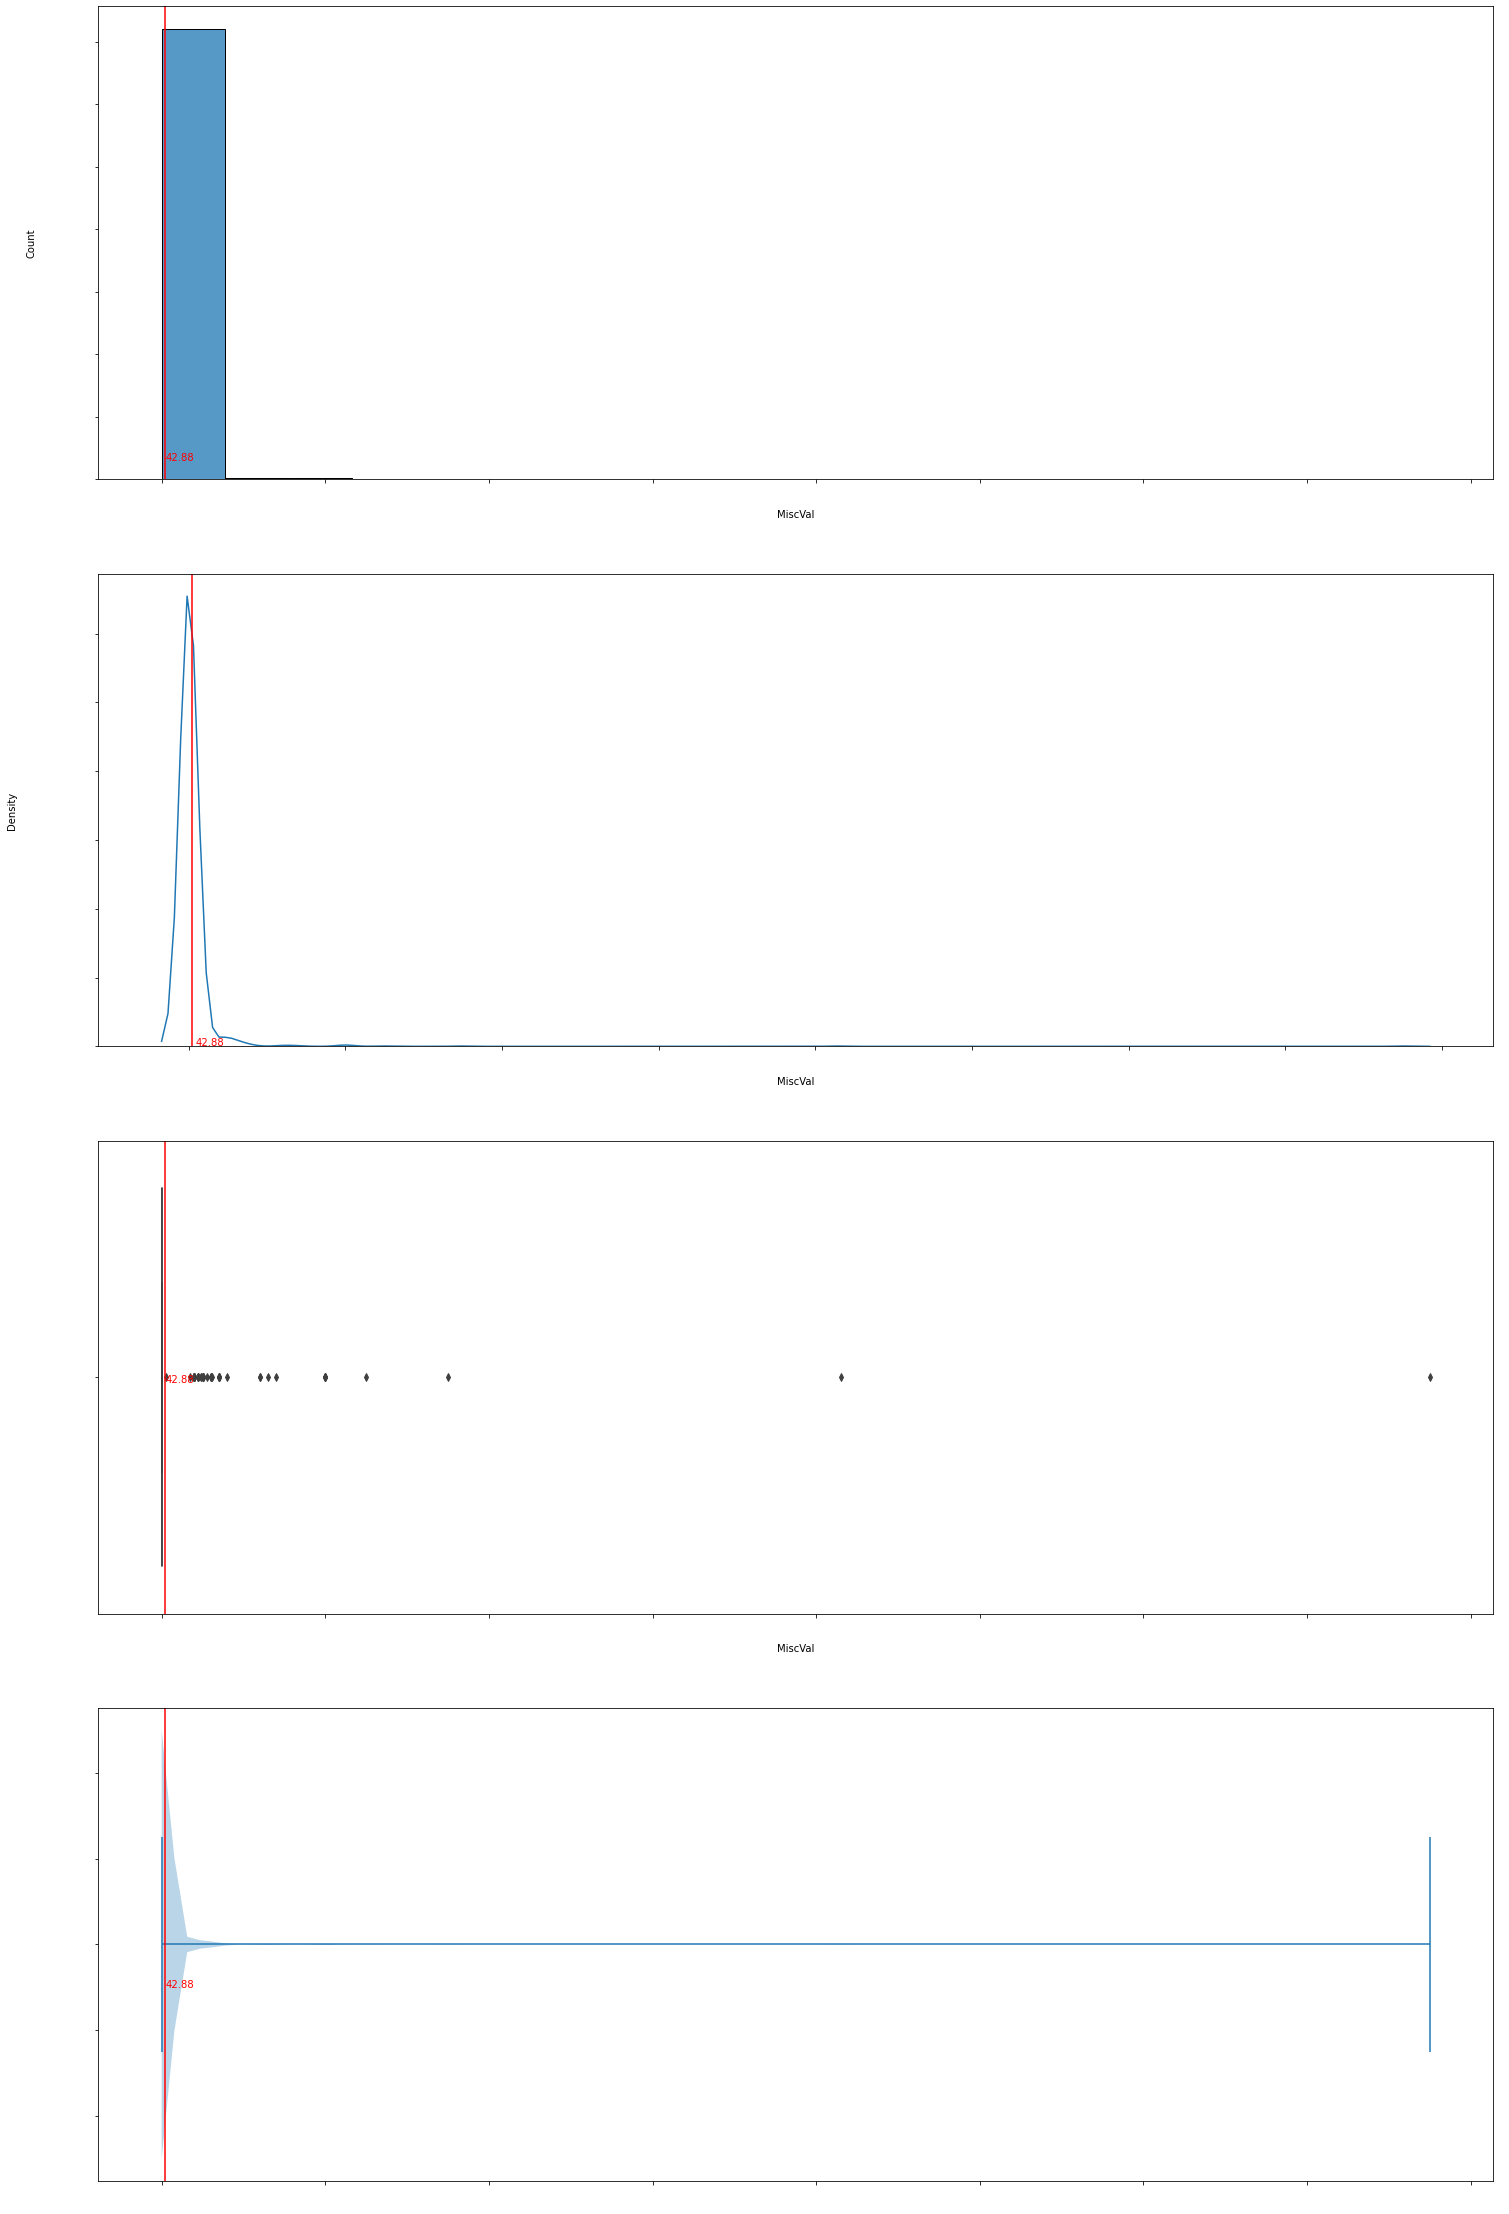

In [38]:
plt.figure(figsize = (25, 40))
var_m = np.mean(data['MiscVal'])

plt.subplot(4, 1, 1)
sns.histplot(data['MiscVal'], bins = 20)
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 0.5, 60, round(var_m, 2), color='r')
# plt.text(var_m + 0.1, 0.8, round(var_m, 2), color='r')
plt.xticks(color='w', size=20) 
plt.yticks(color='w', size=20) 

plt.subplot(4, 1, 2)
sns.kdeplot(data['MiscVal'])
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 50, 6e-6, round(var_m, 2), color='r')
plt.xticks(color='w', size=20) 
plt.yticks(color='w', size=20) 

plt.subplot(4, 1, 3)
sns.boxplot(data['MiscVal'])
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 0.5, 0.01, round(var_m, 2), color='r')
plt.xticks(color='w', size=20) 
plt.yticks(color='w', size=20) 

plt.subplot(4, 1, 4)
plt.violinplot(data['MiscVal'], vert = False, showmeans = False)
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 0.5, 0.95, round(var_m, 2), color='r')
plt.xticks(color='w', size=20) 
plt.yticks(color='w', size=20) 

plt.show()

In [39]:
data['MiscVal'].describe()

count     1454.000000
mean        42.877579
std        496.291170
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      15500.000000
Name: MiscVal, dtype: float64

In [40]:
data['MiscVal'].value_counts()

0        1403
400        11
500         8
700         5
450         4
600         4
2000        4
480         2
1200        2
2500        1
350         1
560         1
54          1
620         1
8300        1
800         1
15500       1
1300        1
1400        1
3500        1
Name: MiscVal, dtype: int64

In [41]:
# 이상치 제거
data = data[data['3SsnPorch']<16000]

- 이상치가 존재함
- 편방피트 0은 기타 기능 값(달러)이 존재하지 않을 것으로 생각함
- 0의 비중이 큰 만큼 이를 제외하고 분석하거나 <br>
존재한다(62)/하지 않는다(1408)로 나누어 추가 분석을 할 수 있을 것으로 보인다.
- 추가 발생하는 비용이 있는 경우일까?

- MoSold (월 판매)

In [42]:
# plt.figure(figsize = (30, 15))
# var_m = np.mean(data['MoSold'])

# plt.subplot(2, 2, 1)
# sns.histplot(data['MoSold'], bins = 12)
# plt.axvline(var_m, color='red', linestyle='-')
# plt.text(var_m + 0.5, 60, round(var_m, 2), color='r')
# # plt.text(var_m + 0.1, 0.8, round(var_m, 2), color='r')

# plt.subplot(2, 2, 2)
# sns.kdeplot(data['MoSold'])
# plt.axvline(var_m, color='red', linestyle='-')
# plt.text(var_m + 0, 6e-6, round(var_m, 2), color='r')

# plt.subplot(2, 2, 3)
# sns.boxplot(data['MoSold'])
# plt.axvline(var_m, color='red', linestyle='-')
# plt.text(var_m + 0.5, 0.01, round(var_m, 2), color='r')

# plt.subplot(2, 2, 4)
# plt.violinplot(data['MoSold'], vert = False, showmeans = False)
# plt.axvline(var_m, color='red', linestyle='-')
# plt.text(var_m + 0.5, 0.95, round(var_m, 2), color='r')

# plt.show()

In [43]:
# data['MoSold'].describe()

In [44]:
# data['MoSold'].value_counts()

- 13. YrSold (연도 판매)

In [45]:
# plt.figure(figsize = (30, 15))
# var_m = np.mean(data['YrSold'])

# plt.subplot(2, 2, 1)
# sns.histplot(data['YrSold'], bins = 5)
# plt.axvline(var_m, color='red', linestyle='-')
# plt.text(var_m + 0.5, 60, round(var_m, 2), color='r')
# # plt.text(var_m + 0.1, 0.8, round(var_m, 2), color='r')

# plt.subplot(2, 2, 2)
# sns.kdeplot(data['YrSold'])
# plt.axvline(var_m, color='red', linestyle='-')
# plt.text(var_m + 0, 6e-6, round(var_m, 2), color='r')

# plt.subplot(2, 2, 3)
# sns.boxplot(data['YrSold'])
# plt.axvline(var_m, color='red', linestyle='-')
# plt.text(var_m + 0.5, 0.01, round(var_m, 2), color='r')

# plt.subplot(2, 2, 4)
# plt.violinplot(data['YrSold'], vert = False, showmeans = False)
# plt.axvline(var_m, color='red', linestyle='-')
# plt.text(var_m + 0.5, 0.95, round(var_m, 2), color='r')

# plt.show()

In [46]:
# data['YrSold'].value_counts()

### 분석결과
0. target = 'SalePrice' (포장된 진입로)
- 왼쪽으로 치우친 그래프 양상 (최빈값: 140000달러 < 평균: 180921 달러 < 중간값: 163000) 
- 이상치가 있음
- 부동산의 판매가격이 어느 부분에 높은 이유를 볼 때 많이 선호하거나 판매되는 가격이 있거나 <br> 법적으로 정해진 부분이 있는 건 아닐까 생각함
<br><br>

2. WoodDeckSF (목재 데크 공간, 피트)
- 이상치가 존재함
- 편방피트 0은 목재 데크 영역이 존재하지 않을 것으로 생각함
- 0의 비중이 큰 만큼 이를 제외하고 분석하거나 <br>
존재한다(699)/하지 않는다(761)로 나누어 추가 분석을 할 수 있을 것으로 보인다.
<br><br>

3. OpenPorchSF (오픈 현관 공간, 피트)
- 왼쪽으로 치우친 그래프 양상 (최빈값: 25피트 = 중간값: 25피트 < 평균: 46 피트)
- 이상치가 존재함
- 편방피트 0은 오픈 베란다 공간이 존재하지 않을 것으로 생각함
- 0의 비중이 큰 만큼 이를 제외하고 분석하거나 <br>
존재한다(804)/하지 않는다(656)로 나누어 추가 분석을 할 수 있을 것으로 보인다.
<br><br>

4. EnclosedPorch (밀폐된 현관 공간, 피트)
- 이상치가 존재함
- 편방피트 0은 밀폐된 현관 공간이 존재하지 않을 것으로 생각함
- 0의 비중이 큰 만큼 이를 제외하고 분석하거나 <br>
존재한다(208)/하지 않는다(1252)로 나누어 추가 분석을 할 수 있을 것으로 보인다.

- 밀폐된 현관 공간을 선호하지 않는 것은 아닐까?
<br><br>

5. 3SsnPorch (3계절 현관 공간, 피트)
- 이상치가 존재함
- 편방피트 0은 (3계절 현관 면적, 평방 피트 = 봄, 여름, 가을)이 존재하지 않을 것으로 생각함
- 0의 비중이 큰 만큼 이를 제외하고 분석하거나 <br>
존재한다(24)/하지 않는다(1436)로 나누어 추가 분석을 할 수 있을 것으로 보인다.

- 3계절 현관 면적을 선호하지 않는 것은 아닐까? 4계절 현관 면적을 선호하는 건 아닐까?
- 4계절 현관 면적에 대한 조사도 필요하다고 생각됨
<br><br>

6. ScreenPorch (스크린 현관 공간, 피트)
- 이상치가 존재함
- 편방피트 0은 스크린 현관 면적이 존재하지 않을 것으로 생각함
- 0의 비중이 큰 만큼 이를 제외하고 분석하거나 <br>
존재한다(116)/하지 않는다(1344)로 나누어 추가 분석을 할 수 있을 것으로 보인다.
- 스크린 베란다 공간을 선호하지 않는 것은 아닐까?
<br><br>

7. PoolArea (수영장 공간, 피트)
- 이상치가 존재함
- 편방피트 0은 수영장 공간이 존재하지 않을 것으로 생각함
- 0의 비중이 큰 만큼 이를 제외하고 분석하거나 <br>
존재한다(7)/하지 않는다(1453)로 나누어 추가 분석을 할 수 있을 것으로 보인다.
- 수영장 공간을 선호하지 않는 것은 아닐까? (생각해보니 건축 비용 문제일수도)
<br><br>

11. MiscVal
- 이상치가 존재함
- 편방피트 0은 기타 기능 값(달러)이 존재하지 않을 것으로 생각함
- 0의 비중이 큰 만큼 이를 제외하고 분석하거나 <br>
존재한다(62)/하지 않는다(1408)로 나누어 추가 분석을 할 수 있을 것으로 보인다.
- 추가 발생하는 비용이 있는 경우일까?

# 단변량 - 범주형 (8개)
- 1. PavedDrive : 포장된 진입로
- 8. PoolQC : 수영장 품질
- 9. Fence : 울타리 품질
- 10. MiscFeature : 기타 기능
- 12. MoSold : 월 판매
- 13. YrSold : 연도 판매
- 14. SaleType : 판매 유형
- 15. SaleCondition : 판매 조건

### 1. PavedDrive (포장된 진입로)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


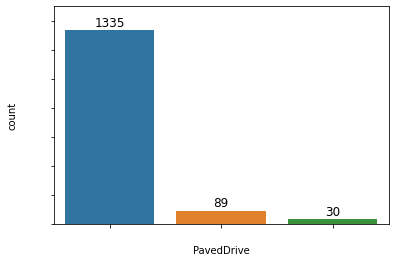

In [47]:
ax = sns.countplot(data['PavedDrive'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, 
            ha = 'center', size = 12)
plt.xticks(color='w', size=10) 
plt.yticks(color='w', size=10) 
ax.set_ylim(0, 1500)

plt.show()

In [48]:
print(data['PavedDrive'].value_counts())

Y    1335
N      89
P      30
Name: PavedDrive, dtype: int64


### 8. PoolQC (수영장 품질)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


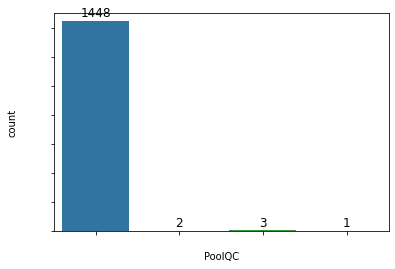

In [49]:
ax = sns.countplot(data['PoolQC'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, 
            ha = 'center', size = 12)
plt.xticks(color='w', size=10) 
plt.yticks(color='w', size=10) 
ax.set_ylim(0, 1500)

plt.show()

In [50]:
print(data['PoolQC'].value_counts())

NO    1448
Gd       3
Fa       2
Ex       1
Name: PoolQC, dtype: int64


### 9. Fence (울타리 품질)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


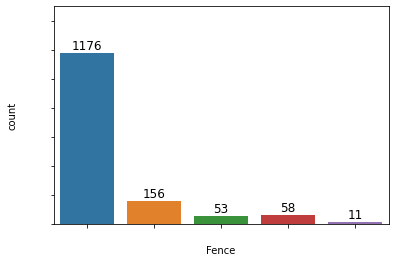

In [51]:
ax = sns.countplot(data['Fence'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, 
            ha = 'center', size = 12)
ax.set_ylim(0, 1500)
plt.xticks(color='w', size=10) 
plt.yticks(color='w', size=10) 

plt.show()

In [52]:
print(data['Fence'].value_counts())

NO       1176
MnPrv     156
GdPrv      58
GdWo       53
MnWw       11
Name: Fence, dtype: int64


### 10. MiscFeature (기타 기능)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


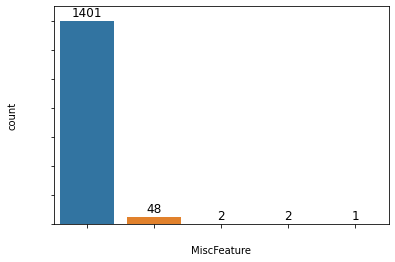

In [53]:
ax = sns.countplot(data['MiscFeature'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, 
            ha = 'center', size = 12)
plt.xticks(color='w', size=10) 
plt.yticks(color='w', size=10) 
ax.set_ylim(0, 1500)

plt.show()

In [54]:
print(data['MiscFeature'].value_counts())

NO      1401
Shed      48
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64


### 12. MoSold (월 판매)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


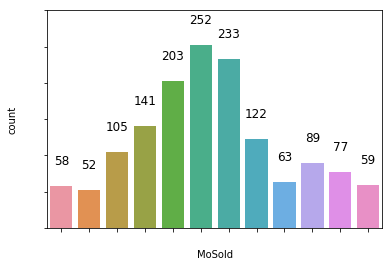

In [55]:
ax = sns.countplot(data['MoSold'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, 
            ha = 'center', size = 12)
plt.xticks(color='w', size=10) 
plt.yticks(color='w', size=10) 
ax.set_ylim(0, 300)

plt.show()

In [56]:
print(data['MoSold'].value_counts())

6     252
7     233
5     203
4     141
8     122
3     105
10     89
11     77
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64


- 5월, 6월, 7월에 가장 많이 판매되었다는 것을 알 수 있다.
- 판매와 월(날씨, 온도 등) 영향이 있는 것은 아닐까?
- 3시즌 현관 영역과도 관련이 있지 것은 아닐까?

### 13. YrSold (연도 판매)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


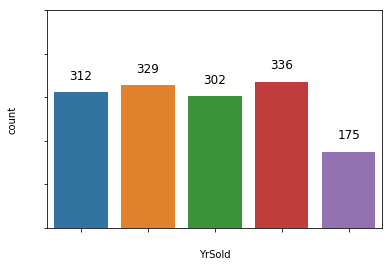

In [57]:
ax = sns.countplot(data['YrSold'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, 
            ha = 'center', size = 12)
plt.xticks(color='w', size=10) 
plt.yticks(color='w', size=10) 
ax.set_ylim(0, 500)

plt.show()

In [58]:
print(data['YrSold'].value_counts())

2009    336
2007    329
2006    312
2008    302
2010    175
Name: YrSold, dtype: int64


- 거의 비슷한 판매 실적을 보이지만 2010년에 매출이 줄어들었다. <br>
(특별한 사건이 있었던 것은 아닐까?)
- 점점 집을 구매하는 인구가 줄어드는 것은 아닐까?

### 14. SaleType (판매 유형)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


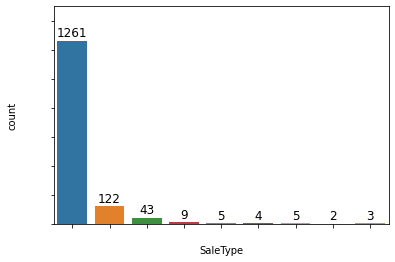

In [59]:
ax = sns.countplot(data['SaleType'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, 
            ha = 'center', size = 12)
plt.xticks(color='w', size=10) 
plt.yticks(color='w', size=10) 
ax.set_ylim(0, 1500)

plt.show()

In [60]:
print(data['SaleType'].value_counts())

WD       1261
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64


### 15. SaleCondition (판매 조건)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


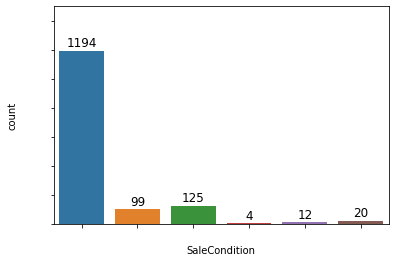

In [61]:
ax = sns.countplot(data['SaleCondition'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, 
            ha = 'center', size = 12)
plt.xticks(color='w', size=10) 
plt.yticks(color='w', size=10) 
ax.set_ylim(0, 1500)

plt.show()

In [62]:
print(data['SaleCondition'].value_counts())

Normal     1194
Partial     125
Abnorml      99
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64


### 분석결과
1. PavedDrive (포장된 진입로) : 포장된 진입로
8. PoolQC (수영장 품질) : 없음
9. Fence (울타리 품질) : 없음
10. MiscFeature (기타 기능) : 없음
<br><br>
12. MoSold (월 판매)
- 5월, 6월, 7월에 가장 많이 판매되었다는 것을 알 수 있다.
- 판매와 월(날씨, 온도 등) 영향이 있는 것은 아닐까?
- 3시즌 현관 영역과도 관련이 있지 것은 아닐까?
- 계절별로 그룹을 만들어 target의 상관관계와 3계절 현관영역의 상관관계 분석을 해 볼 필요가 있음
<br><br>
13. YrSold (연 판매)
- 거의 비슷한 판매 실적을 보이지만 2010년에 매출이 줄어들었다.
- 이를 볼 때 그 해에 특별한 사건이 있었거나
- 점차 줄어드는 이유가 있는 것은 아닐까 생각된다.
<br><br>
14. SaleType (판매 유형) : WD 보증 증서 - 기존
15. SaleCondition (판매 조건) : 정상 판매

In [63]:
# data.loc[(data['GarageArea'] > 0) & (data['MiscFeature'] == 'Gar2')]

In [64]:
# len(data.loc[data['MiscFeature']=='Gar2'])

# 이변량 - feature(숫자형) -> target(숫자형)


- 2. WoodDeckSF : 평방 피트의 목재 데크 영역 (목재 데크 면적, 평방 피트)
- 3. OpenPorchSF : 평방 피트의 목재 데크 영역 (목재 데크 면적, 평방 피트)
- 4. EnclosedPorch : 평방 피트의 밀폐된 현관 공간 (밀폐된 현관 면적, 평방 피트)
- 5. 3SsnPorch : 평방 피트의 3시즌 현관 지역 (3계절 현관 면적, 평방 피트 = 봄, 여름, 가을)
- 6. ScreenPorch : 평방 피트의 3시즌 현관 지역 (3계절 현관 면적, 평방 피트 = 봄, 여름, 가을)
- 7. PoolArea : 평방 피트의 수영장 공간 (수영장 면적, 평방 피트)
- 11. MiscVal : 기타 기능 값 (달러)

In [245]:
# WoodDeckSF_cut 숫자형 데이터를 그룹으로
bin = [-np.inf, 1, 200, np.inf]
label = ['No', '200미만', '200이상']
data['WoodDeckSF_cut'] = pd.cut(data['WoodDeckSF'], bins=bin, labels=label, right=False)

# OpenPorchSF_cut 숫자형 데이터를 그룹으로
bin = [-np.inf, 1, 100, np.inf]
label = ['No', '100미만', '100이상']
data['OpenPorchSF_cut'] = pd.cut(data['OpenPorchSF'], bins=bin, labels=label, right=False)

# EnclosedPorch_cut 숫자형 데이터를 그룹으로
bin = [-np.inf, 1, 100, 200, 300, np.inf]
label = ['No', '100미만', '200미만', '300미만', '300이상']
data['EnclosedPorch_cut'] = pd.cut(data['EnclosedPorch'], bins=bin, labels=label, right=False)

In [246]:
NO = data.loc[data['WoodDeckSF_cut']=='No', target]
w2d = data.loc[data['WoodDeckSF_cut']=='200미만', target]
w2u = data.loc[data['WoodDeckSF_cut']=='200이상', target]

spst.f_oneway(NO, w2d, w2u)

F_onewayResult(statistic=79.9036782745608, pvalue=1.1823035177738621e-33)

In [247]:
NO = data.loc[data['OpenPorchSF_cut']=='No', target]
o2d = data.loc[data['OpenPorchSF_cut']=='100미만', target]
o2u = data.loc[data['OpenPorchSF_cut']=='100이상', target]

spst.f_oneway(NO, o2d, o2u)

F_onewayResult(statistic=152.78319439751186, pvalue=5.7982681703030785e-61)

### 2. WoodDeckSF

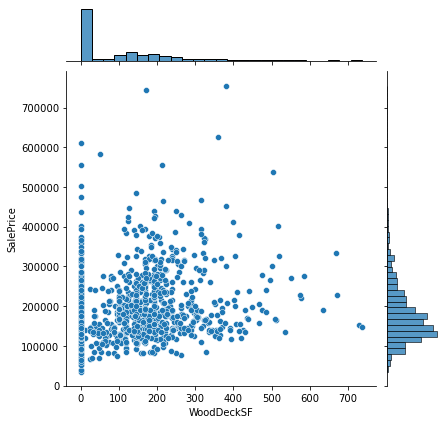

In [65]:
sns.jointplot(x='WoodDeckSF', y=target, data=data)
plt.show()

In [66]:
spst.pearsonr(data['WoodDeckSF'], data[target])
# 피어슨상관계수, p-value

(0.31938969671966416, 7.747425741541596e-36)

### 3. OpenPorchSF

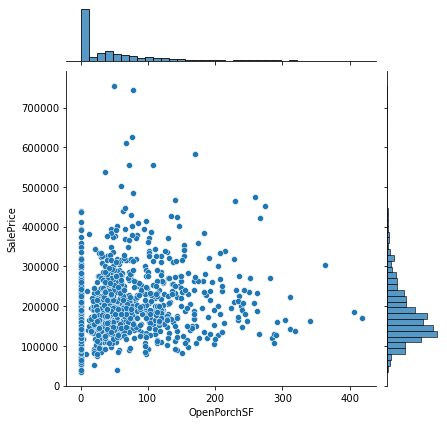

In [67]:
sns.jointplot(x='OpenPorchSF', y=target, data=data)
plt.show()

In [68]:
spst.pearsonr(data['OpenPorchSF'], data[target])

(0.33081477043129837, 1.7985963091339763e-38)

### 4. EnclosedPorch

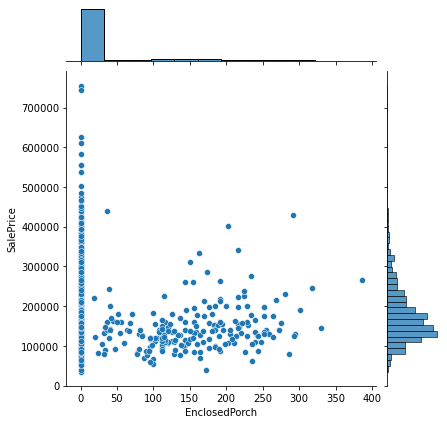

In [69]:
sns.jointplot(x='EnclosedPorch', y=target, data=data)
plt.show()

In [70]:
spst.pearsonr(data['EnclosedPorch'], data[target])

(-0.13369453340205154, 3.1116797140975886e-07)

### 5. 3SsnPorch

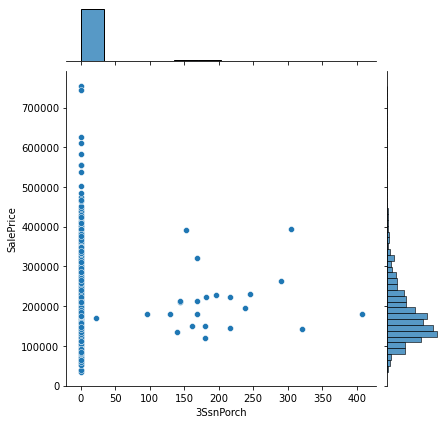

In [71]:
sns.jointplot(x='3SsnPorch', y=target, data=data)
plt.show()

In [72]:
spst.pearsonr(data['3SsnPorch'], data[target])

(0.050606810476752334, 0.05369577345446337)

### 6. ScreenPorch

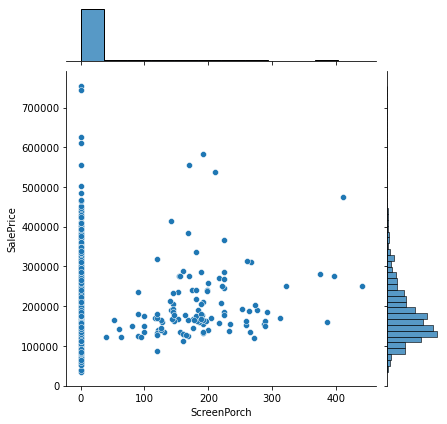

In [73]:
sns.jointplot(x='ScreenPorch', y=target, data=data)
plt.show()

In [74]:
spst.pearsonr(data['ScreenPorch'], data[target])

(0.10983092211932144, 2.703516049517867e-05)

### 7. PoolArea

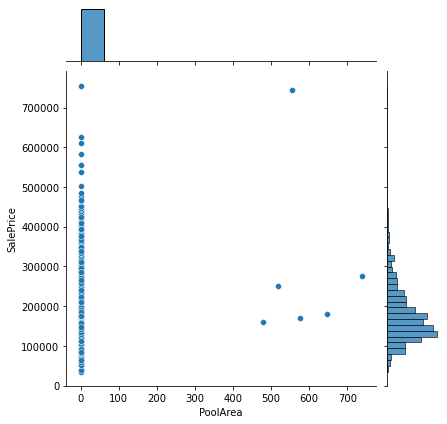

In [75]:
sns.jointplot(x='PoolArea', y=target, data=data)
plt.show()

In [76]:
spst.pearsonr(data['PoolArea'], data[target])

(0.09230154754633316, 0.00042495447031842457)

### 11. MiscVal

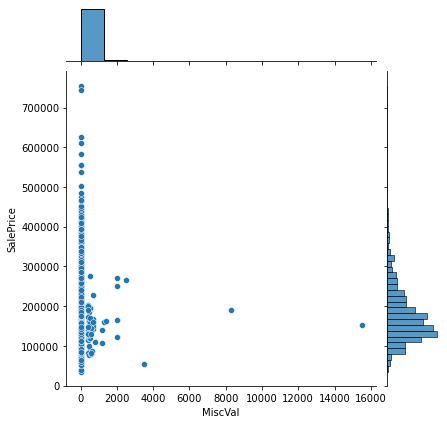

In [77]:
sns.jointplot(x='MiscVal', y=target, data=data)
plt.show()

In [78]:
spst.pearsonr(data['MiscVal'], data[target])

(-0.022596632594396773, 0.38923306467515245)

- 12. MoSold

In [79]:
# sns.jointplot(x='MoSold', y=target, data=data)
# plt.show()

In [80]:
# spst.pearsonr(data['MoSold'], data[target])

- 13. YrSold

In [81]:
# sns.jointplot(x='YrSold', y=target, data=data)
# plt.show()

In [82]:
# spst.pearsonr(data['YrSold'], data[target])

### 상관관계 시각화

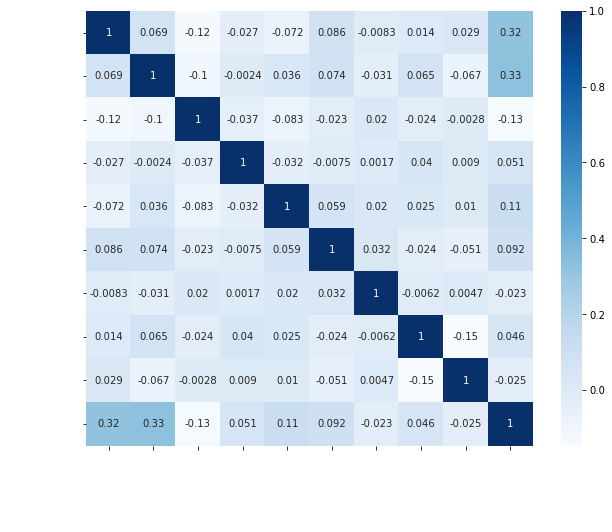

In [83]:
plt.figure(figsize=(10, 8))
sns.heatmap(data[col].corr(), annot=True, cmap='Blues')
plt.xticks(color='w') 
plt.yticks(color='w') 
plt.show()

### 분석결과

2. WoodDeckSF 
- 피어슨 상관계수: 0.3244134445681299 / p-value: 3.972216535629994e-37
<br>
3. OpenPorchSF
- 피어슨 상관계수: 0.3158562271160553 / p-value: 3.493373623097777e-35
<br>
4. EnclosedPorch
- 피어슨 상관계수: -0.12857795792595675 / p-value: 8.255770475119532e-07
<br>
5. 3SsnPorch  
- 피어슨 상관계수: 0.04458366533574841 / p-value: 0.08858170358062883
<br>
6. ScreenPorch  
- 피어슨 상관계수: 0.1114465711429112 / p-value: 1.9721400194702135e-05
<br>
7. PoolArea 
- 피어슨 상관계수: 0.0924035494918732 / p-value: 0.0004073489601199127
<br>
11. MiscVal
- 피어슨 상관계수: -0.02118957964030326 / p-value: 0.4184863494082891

# 이변량 - feature(범주형) -> target(숫자형)
- 1. PavedDrive : 포장된 진입로
- 8. PoolQC : 수영장 품질
- 9. Fence : 울타리 품질
- 10. MiscFeature : 기타 기능
- 12. MoSold : 월 판매
- 13. YrSold : 연도 판매
- 14. SaleType : 판매 유형
- 15. SaleCondition : 판매 조건

### 1. PavedDrive

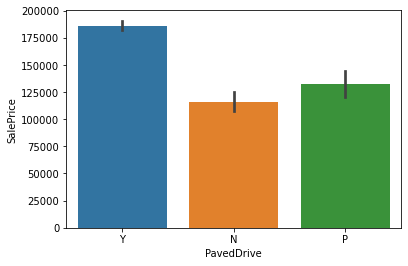

In [84]:
sns.barplot(x='PavedDrive', y=target, data = data)
plt.show()

In [85]:
Y = data.loc[data['PavedDrive']=='Y', target]
N = data.loc[data['PavedDrive']=='N', target]
P = data.loc[data['PavedDrive']=='P', target]

spst.f_oneway(Y, N, P)

F_onewayResult(statistic=40.533841745754295, pvalue=7.4225580132915e-18)

### 8. PoolQC

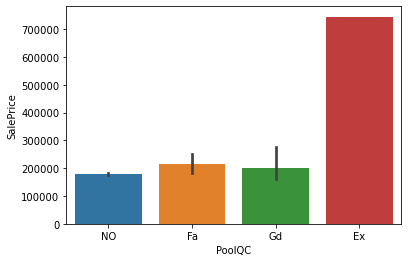

In [86]:
sns.barplot(x='PoolQC', y=target, data = data)
plt.show()

In [87]:
N = data.loc[data['PoolQC']=='NO', target]
E = data.loc[data['PoolQC']=='Ex', target]
F = data.loc[data['PoolQC']=='Fa', target]
G = data.loc[data['PoolQC']=='Gd', target]

spst.f_oneway(N, E, F, G)

F_onewayResult(statistic=17.730583698544347, pvalue=2.639808241102507e-11)

### 9. Fence

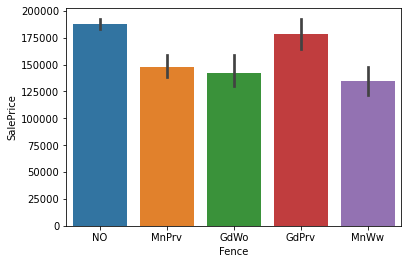

In [88]:
sns.barplot(x='Fence', y=target, data = data)
plt.show()

In [89]:
data['Fence'].unique()

array(['NO', 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [90]:
N = data.loc[data['Fence']=='NO', target]
M = data.loc[data['Fence']=='MnPrv', target]
GW = data.loc[data['Fence']=='GdWo', target]
GP = data.loc[data['Fence']=='GdPrv', target]
MW = data.loc[data['Fence']=='MnWw', target]

spst.f_oneway(N, M, GW, GP, MW)

F_onewayResult(statistic=13.165348546602633, pvalue=1.5464791428688462e-10)

### 10. MiscFeature

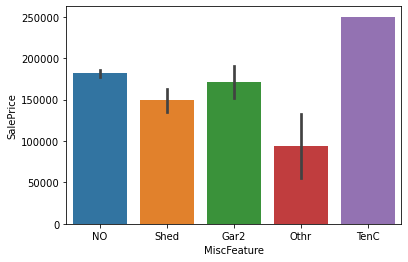

In [91]:
sns.barplot(x='MiscFeature', y=target, data = data)
plt.show()

In [92]:
data['MiscFeature'].unique()

array(['NO', 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [93]:
N = data.loc[data['MiscFeature']=='NO', target]
S = data.loc[data['MiscFeature']=='Shed', target]
GA = data.loc[data['MiscFeature']=='Gar2', target]
OT = data.loc[data['MiscFeature']=='Othr', target]
TE = data.loc[data['MiscFeature']=='TenC', target]

spst.f_oneway(N, S, GA, OT, TE)

F_onewayResult(statistic=2.8100725371277204, pvalue=0.02435793461262511)

### 12. MoSold

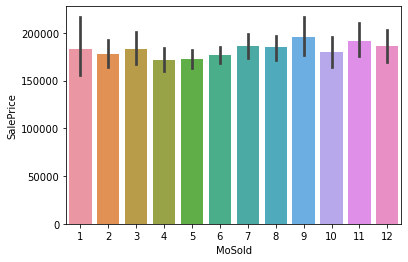

In [94]:
sns.barplot(x='MoSold', y=target, data = data)
plt.show()

In [95]:
data['MoSold'].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

In [96]:
M1 = data.loc[data['MoSold']==1, target]
M2 = data.loc[data['MoSold']==2, target]
M3 = data.loc[data['MoSold']==3, target]
M4 = data.loc[data['MoSold']==4, target]
M5 = data.loc[data['MoSold']==5, target]
M6 = data.loc[data['MoSold']==6, target]
M7 = data.loc[data['MoSold']==7, target]
M8 = data.loc[data['MoSold']==8, target]
M9 = data.loc[data['MoSold']==9, target]
M10 = data.loc[data['MoSold']==10, target]
M11 = data.loc[data['MoSold']==11, target]
M12 = data.loc[data['MoSold']==12, target]

spst.f_oneway(M1, M2, M3, M4, M5, M6, M7, M8, M9, M10, M11, M12)

F_onewayResult(statistic=0.9322672585401565, pvalue=0.5080059037091408)

### 13. YrSold

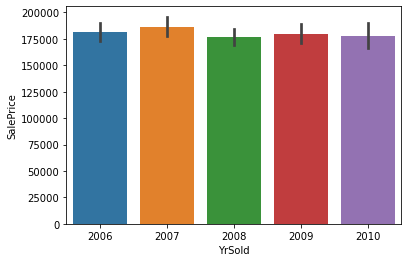

In [97]:
sns.barplot(x='YrSold', y=target, data = data)
plt.show()

In [98]:
data['YrSold'].unique()

array([2008, 2007, 2006, 2009, 2010], dtype=int64)

In [99]:
Y6 = data.loc[data['YrSold']==2006, target]
Y7 = data.loc[data['YrSold']==2007, target]
Y8 = data.loc[data['YrSold']==2008, target]
Y9 = data.loc[data['YrSold']==2009, target]
Y10 = data.loc[data['YrSold']==2010, target]
spst.f_oneway(Y6, Y7, Y8, Y9, Y10)

F_onewayResult(statistic=0.6766137427254315, pvalue=0.6082008250885154)

### 14. SaleType

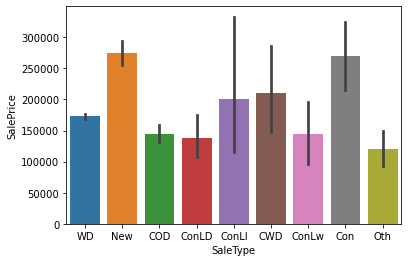

In [100]:
sns.barplot(x='SaleType', y=target, data = data)
plt.show()

In [101]:
data['SaleType'].unique()

array(['WD', 'New', 'COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth'],
      dtype=object)

In [102]:
WD = data.loc[data['SaleType']=='WD', target]
NE = data.loc[data['SaleType']=='New', target]
COD = data.loc[data['SaleType']=='COD', target]
CLD = data.loc[data['SaleType']=='ConLD', target]
CLI = data.loc[data['SaleType']=='ConLI', target]
CWD = data.loc[data['SaleType']=='CWD', target]
CLW = data.loc[data['SaleType']=='ConLw', target]
CON = data.loc[data['SaleType']=='Con', target]
OTH = data.loc[data['SaleType']=='Oth', target]

spst.f_oneway(WD, NE, COD, CLD, CLI, CWD, CLW, CON, OTH)

F_onewayResult(statistic=29.224896096097815, pvalue=1.5402741124069224e-42)

### 15. SaleCondition

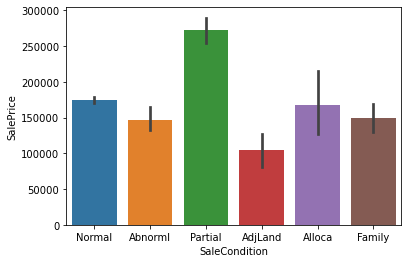

In [103]:
sns.barplot(x='SaleCondition', y=target, data = data)
plt.show()

In [104]:
data['SaleCondition'].unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

In [105]:
NO = data.loc[data['SaleCondition']=='Normal', target]
AB = data.loc[data['SaleCondition']=='Abnorml', target]
PA = data.loc[data['SaleCondition']=='Partial', target]
AD = data.loc[data['SaleCondition']=='AdjLand', target]
AL = data.loc[data['SaleCondition']=='Alloca', target]
FA = data.loc[data['SaleCondition']=='Family', target]

spst.f_oneway(NO, AB, PA, AD, AL ,FA)

F_onewayResult(statistic=45.97033060897726, pvalue=3.569815935695048e-44)

### 분석결과

1. PavedDrive : 포장된 진입로
- F 통계량: 42.02417941762533 / pvalue: 1.803568890651533e-18
<br>
8. PoolQC : 수영장 품질
- F 통계량:10.509852607071148 / pvalue: 7.7009894157147e-07
<br>
9. Fence : 울타리 품질
- F 통계량: 13.433275547560223 / pvalue: 9.379976594788224e-11
<br>
10. MiscFeature : 기타 기능
- F 통계량: 2.593622339924057 / pvalue: 0.0350036718754261
<br>
12. MoSold : 월 판매
- F 통계량: 0.9578652656318107 / pvalue: 0.48335232989243127
<br>
13. YrSold : 연도 판매
- F 통계량: 0.6455252211679311 / pvalue: 0.6300887663573457
<br>
14. SaleType : 판매 유형
- F 통계량: 28.863054116984088 / pvalue: 5.039766889462451e-42
<br>
15. SaleCondition : 판매 조건
- F 통계량: 45.57842830969571 / pvalue: 7.988268404991176e-44

# 관계 분석 결과

1) 강한 상관관계
- 숫자형: WoodDeckSF, OpenPorchSF
- 범주형: PavedDrive, SaleType, SaleCondition
<br><br>

2) 중간 상관관계
- 숫자형: EnclosedPorch, ScreenPorch, PoolArea
- 범주형: PoolQC, Fence, MiscFeature
<br><br>

3) 약한 상관관계
- 숫자형: 3SanPorch, MisVal
- 범주형: MoSold, YrSold

# 추가분석 - 약한 상관관계

### MoSold (월 판매) 데이터로 그룹 -> Target

#### 1) 계절 데이터
- MoSold (월 판매) 데이터로 그룹 => 계절 데이터
<br><br>
- 여름: 6월~8월
- 가을: 9월~11월
- 겨울: 12월~2월
- 봄: 3월~5월 
<br><br>
- 여름 동안 북부에 위치한 주들은 낮에는 따뜻하고(더울 때도 있습니다) 이른 아침과 밤에는 쌀쌀한 날씨가 교차합니다. <br>반면, 남부에 위치한 주와 아열대성 지역에서는 무더운 날씨가 계속됩니다.
- 가을에는 미국 전역에서 기온이 떨어지기 시작합니다. <br>
북부 지역의 가을은 특히 울긋불긋한 단풍으로 물들어 많은 이들의 발길을 불러모읍니다.
- 겨울에도 남부 지역의 주들은 온화한 날씨를 유지하지만 북부, 중서부, 서부 산악지대, 캐나다와 인접한 대초원 지대에서는 많은 눈과 함께 매서운 추위가 이어집니다.
- 봄이 되면 기온이 다시 올라가며 여름의 문턱에 들어설 때까지 미국 전역에서 뇌우와 폭풍우가 자주 발생합니다. 

In [106]:
data['MoSold_s'] = data['MoSold'].map({6:'summer', 7:'summer', 8:'summer',
                                     9:'fall', 10:'fall', 11:'fall',
                                     12:'winter', 1:'winter', 2:'winter',
                                    3:'spring', 4:'spring', 5:'spring'})

In [107]:
data['MoSold_s'].value_counts()

summer    607
spring    449
fall      229
winter    169
Name: MoSold_s, dtype: int64

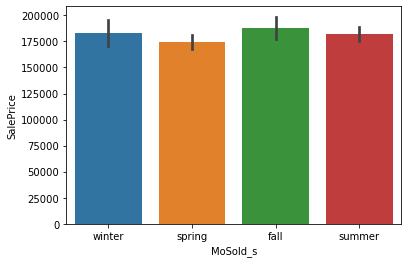

In [108]:
sns.barplot(x='MoSold_s', y=target, data = data)
plt.show()

In [109]:
spring = data.loc[data['MoSold_s']=='spring', target]
summer = data.loc[data['MoSold_s']=='summer', target]
fall = data.loc[data['MoSold_s']=='fall', target]
winter = data.loc[data['MoSold_s']=='winter', target]

spst.f_oneway(spring, summer, fall, winter)

F_onewayResult(statistic=1.6764434070443837, pvalue=0.17016724950196857)

#### 2) semester 학기
- MoSold (월 판매) 데이터로 그룹 => semester 학기 데이터
<br><br>
- 12, 1월: 겨울방학
- 2, 3, 4, 5월: 봄학기
- 6, 7, 8월: 여름방학
- 9, 10, 11월: 가을학기
<br><br>
- 미국의 교육기관 75%가 채택하고 있는 방법, 총 2학기를 뜻한다.

In [110]:
data['MoSold_e'] = data['MoSold'].map({12:'winter_va', 1:'winter_va',
                                     2:'spring_se', 3:'spring_se', 4:'spring_se', 5:'spring_se',
                                     6:'summer_va', 7:'summer_va', 8:'summer_va', 
                                     9:'fall_se', 10:'fall_se', 11:'fall_se'})

In [111]:
data['MoSold_e'].value_counts()

summer_va    607
spring_se    501
fall_se      229
winter_va    117
Name: MoSold_e, dtype: int64

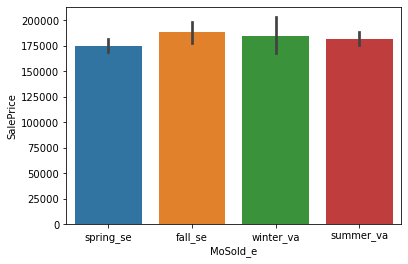

In [112]:
sns.barplot(x='MoSold_e', y=target, data = data)
plt.show()

In [113]:
spring = data.loc[data['MoSold_e']=='spring_se', target]
summer = data.loc[data['MoSold_e']=='summer_va', target]
fall = data.loc[data['MoSold_e']=='fall_se', target]
winter = data.loc[data['MoSold_e']=='winter_va', target]

spst.f_oneway(spring, summer, fall, winter)

F_onewayResult(statistic=1.7423848140024172, pvalue=0.15640845395158035)

### 3SsnPorch  (3시즌 현관 지역) 데이터로 그룹 -> Target

In [114]:
data.loc[data['3SsnPorch']>0, '3SsnPorch']='YES'

In [115]:
data.loc[data['3SsnPorch']!='YES', '3SsnPorch']='NO'

In [116]:
data['3SsnPorch'].value_counts()

NO     1431
YES      23
Name: 3SsnPorch, dtype: int64

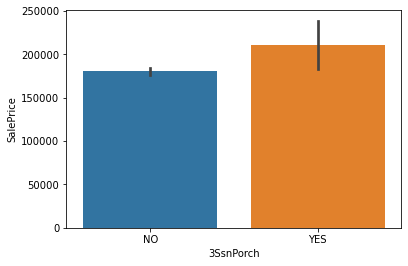

In [117]:
sns.barplot(x='3SsnPorch', y=target, data = data)
plt.show()

In [118]:
NO = data.loc[data['3SsnPorch']=='NO', target]
YES = data.loc[data['3SsnPorch']=='YES', target]
spst.ttest_ind(NO, YES)

Ttest_indResult(statistic=-1.816659084895562, pvalue=0.06947542900237297)

###  

# 추가분석 - 중간 상관관계

### PoolQC (수영장 품질)

In [119]:
data['PoolQC'] = data['PoolQC'].map({'NO':'NO', 'Ex':'YES',
                                     'Fa':'YES', 'Gd':'YES'})

In [120]:
data['PoolQC'].value_counts()

NO     1448
YES       6
Name: PoolQC, dtype: int64

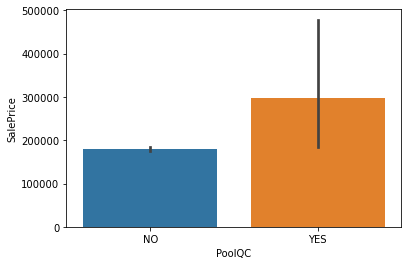

In [121]:
sns.barplot(x='PoolQC', y=target, data = data)
plt.show()

In [122]:
NO = data.loc[data['PoolQC']=='NO', target]
YES = data.loc[data['PoolQC']=='YES', target]
spst.ttest_ind(NO, YES)

Ttest_indResult(statistic=-3.619098016635756, pvalue=0.0003057783645544235)

### Fence (울타리)

In [123]:
data['Fence'] = data['Fence'].map({'NO':'NO', 'MnPrv':'YES',
                                     'GdPrv':'YES', 'GdWo':'YES', 'GMnWw':'YES'})

In [124]:
data['Fence'].value_counts()

NO     1176
YES     267
Name: Fence, dtype: int64

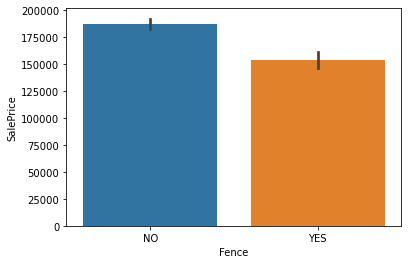

In [125]:
sns.barplot(x='Fence', y=target, data = data)
plt.show()

In [126]:
NO = data.loc[data['Fence']=='NO', target]
YES = data.loc[data['Fence']=='YES', target]
spst.ttest_ind(NO, YES)

Ttest_indResult(statistic=6.383836774604242, pvalue=2.323407887568541e-10)

### * MiscFeature (기타 기능)

In [127]:
data['MiscFeature'] = data['MiscFeature'].map({'NO':'NO', 'Shed':'YES',
                                     'Othr':'YES', 'Gar2':'YES', 'TenC':'YES'})

In [128]:
data['MiscFeature'].value_counts()

NO     1401
YES      53
Name: MiscFeature, dtype: int64

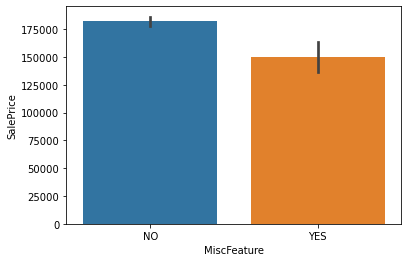

In [129]:
sns.barplot(x='MiscFeature', y=target, data = data)
plt.show()

In [130]:
NO = data.loc[data['MiscFeature']=='NO', target]
YES = data.loc[data['MiscFeature']=='YES', target]
spst.ttest_ind(NO, YES)

Ttest_indResult(statistic=2.9138523509844805, pvalue=0.003624645895177473)

# 추가분석 - 강한 상관관계

### * WoodDeckSF
- 평방 피트의 목재 데크 영역 (목재 데크 면적, 평방 피트)이 있다/없다로 그룹 지어 추가분석

In [131]:
data.loc[data['WoodDeckSF']>0, 'WoodDeckSF']='YES'

In [132]:
data.loc[data['WoodDeckSF']!='YES', 'WoodDeckSF']='NO'

In [133]:
data['WoodDeckSF'].value_counts()

NO     757
YES    697
Name: WoodDeckSF, dtype: int64

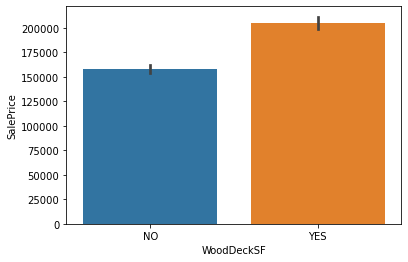

In [134]:
sns.barplot(x='WoodDeckSF', y=target, data = data)
plt.show()

In [135]:
NO = data.loc[data['WoodDeckSF']=='NO', target]
YES = data.loc[data['WoodDeckSF']=='YES', target]
spst.ttest_ind(NO, YES)

Ttest_indResult(statistic=-11.82891153815244, pvalue=6.889258790664898e-31)

### * OpenPorchSF
- 평방 피트의 오픈 베란다 공간 (오픈 베란다 영역, 평방 피트)이 있다/없다로 그룹 지어 추가분석

In [136]:
data.loc[data['OpenPorchSF']>0, 'OpenPorchSF']='YES'

In [137]:
data.loc[data['OpenPorchSF']!='YES', 'OpenPorchSF']='NO'

In [138]:
data['OpenPorchSF'].value_counts()

YES    798
NO     656
Name: OpenPorchSF, dtype: int64

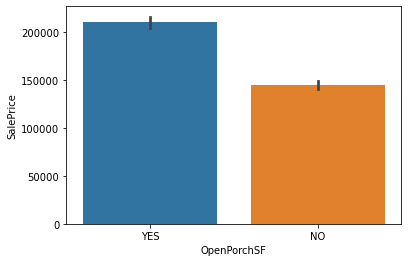

In [139]:
sns.barplot(x='OpenPorchSF', y=target, data = data)
plt.show()

In [140]:
NO = data.loc[data['OpenPorchSF']=='NO', target]
YES = data.loc[data['OpenPorchSF']=='YES', target]
spst.ttest_ind(NO, YES)

Ttest_indResult(statistic=-17.28706045754427, pvalue=4.9400989288375896e-61)

# 추가분석 - feature와 feature

In [ ]:
# F_onewayResult(statistic=80.0085975144128, pvalue=1.0756465465984633e-33)

In [258]:
# WoodDeckSF_cut 숫자형 데이터를 그룹으로
bin = [-np.inf, 1, 200, 400, 600, np.inf]
label = ['No', 200, 400, 600, 800]

data['WoodDeckSF_cut'] = pd.cut(data['WoodDeckSF'], bins=bin, labels=label, right=False)

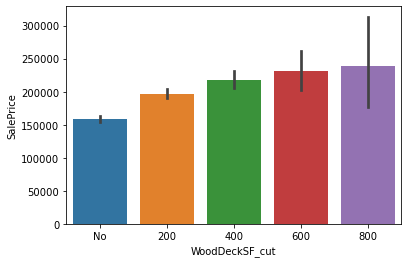

In [259]:
sns.barplot(x='WoodDeckSF_cut', y=target, data = data)
plt.show()

In [260]:
NO = data.loc[data['WoodDeckSF_cut']=='No', target]
w2 = data.loc[data['WoodDeckSF_cut']==200, target]
w4 = data.loc[data['WoodDeckSF_cut']==400, target]
w6 = data.loc[data['WoodDeckSF_cut']==600, target]
w8 = data.loc[data['WoodDeckSF_cut']==800, target]

spst.f_oneway(NO, w2, w4, w6, w8)

F_onewayResult(statistic=40.28213243217724, pvalue=4.8204641018920126e-32)

In [261]:
# OpenPorchSF_cut 숫자형 데이터를 그룹으로
bin = [-np.inf, 1, 100, 200, 300, np.inf]
label = ['No', 100, 200, 300, 400]

data['OpenPorchSF_cut'] = pd.cut(data['OpenPorchSF'], bins=bin, labels=label, right=False)

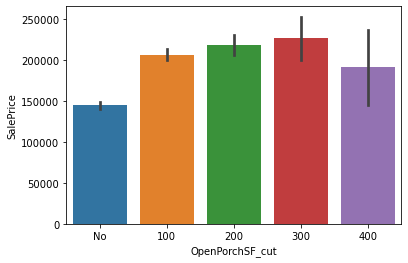

In [262]:
sns.barplot(x='OpenPorchSF_cut', y=target, data = data)
plt.show()

In [263]:
NO = data.loc[data['OpenPorchSF_cut']=='No', target]
o1 = data.loc[data['OpenPorchSF_cut']==100, target]
o2 = data.loc[data['OpenPorchSF_cut']==200, target]
o3 = data.loc[data['OpenPorchSF_cut']==300, target]
o4 = data.loc[data['OpenPorchSF_cut']==400, target]

spst.f_oneway(NO, o1, o2, o3, o4)

F_onewayResult(statistic=76.92988731362472, pvalue=3.1027404179404004e-59)

In [264]:
# EnclosedPorch_cut 숫자형 데이터를 그룹으로
bin = [-np.inf, 1, 100, 200, 300, np.inf]
label = ['No', 100, 200, 300, 400]

data['EnclosedPorch_cut'] = pd.cut(data['EnclosedPorch'], bins=bin, labels=label, right=False)

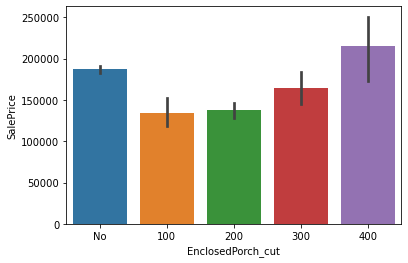

In [265]:
sns.barplot(x='EnclosedPorch_cut', y=target, data = data)
plt.show()

In [266]:
NO = data.loc[data['EnclosedPorch_cut']=='No', target]
e1 = data.loc[data['EnclosedPorch_cut']==100, target]
e2 = data.loc[data['EnclosedPorch_cut']==200, target]
e3 = data.loc[data['EnclosedPorch_cut']==300, target]
e4 = data.loc[data['EnclosedPorch_cut']==400, target]

spst.f_oneway(NO, e1, e2, e3, e4)

F_onewayResult(statistic=14.968824488168318, pvalue=5.397533038825212e-12)

In [188]:
# 3SsnPorch_cut 숫자형 데이터를 그룹으로
bin = [-np.inf, 1, 150, 300, np.inf]
label = ['No', 150, 300, 450]

data['3SsnPorch_cut'] = pd.cut(data['3SsnPorch'], bins=bin, labels=label)

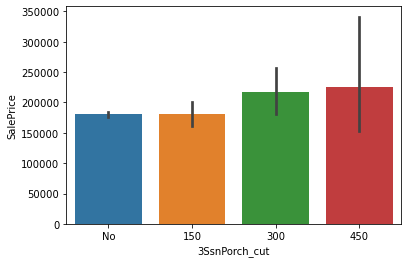

In [189]:
sns.barplot(x='3SsnPorch_cut', y=target, data = data)
plt.show()

In [190]:
NO = data.loc[data['3SsnPorch_cut']=='No', target]
se1 = data.loc[data['3SsnPorch_cut']==150, target]
se3 = data.loc[data['3SsnPorch_cut']==300, target]
se4 = data.loc[data['3SsnPorch_cut']==450, target]

spst.f_oneway(NO, se1, se3, se4)

F_onewayResult(statistic=1.3694077414603167, pvalue=0.2504667402068797)

In [191]:
# ScreenPorch_cut 숫자형 데이터를 그룹으로
bin = [-np.inf, 1, 100, 200, 300, np.inf]
label = ['No', 100, 200, 300, 400]

data['ScreenPorch_cut'] = pd.cut(data['ScreenPorch'], bins=bin, labels=label)

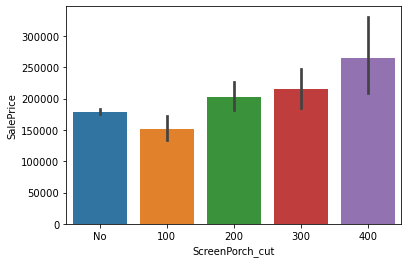

In [192]:
sns.barplot(x='ScreenPorch_cut', y=target, data = data)
plt.show()

In [193]:
NO = data.loc[data['ScreenPorch_cut']=='No', target]
sc1 = data.loc[data['ScreenPorch_cut']==100, target]
sc2 = data.loc[data['ScreenPorch_cut']==200, target]
sc3 = data.loc[data['ScreenPorch_cut']==300, target]
sc4 = data.loc[data['ScreenPorch_cut']==400, target]

spst.f_oneway(NO, sc1, sc2, sc3, sc4)

F_onewayResult(statistic=5.448795076836836, pvalue=0.0002354409918874269)

In [194]:
# PoolArea_cut 숫자형 데이터를 그룹으로
data.loc[data['PoolArea']>0, 'PoolArea']='YES'
data.loc[data['PoolArea']!='YES', 'PoolArea']='NO'

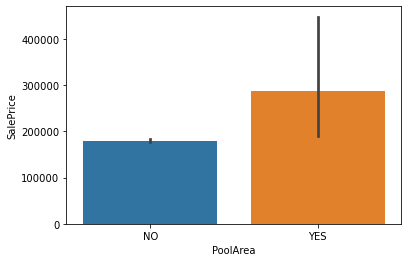

In [195]:
sns.barplot(x='PoolArea', y=target, data = data)
plt.show()

In [196]:
NO = data.loc[data['PoolArea']=='NO', target]
YES = data.loc[data['PoolArea']=='YES', target]
spst.ttest_ind(NO, YES)

Ttest_indResult(statistic=-3.593943524548988, pvalue=0.000336552381430235)

In [197]:
# MiscVal_cut 숫자형 데이터를 그룹으로
data.loc[data['MiscVal']>0, 'MiscVal']='YES'
data.loc[data['MiscVal']!='YES', 'MiscVal']='NO'

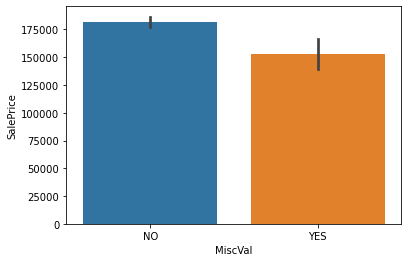

In [198]:
sns.barplot(x='MiscVal', y=target, data = data)
plt.show()

In [199]:
NO = data.loc[data['MiscVal']=='NO', target]
YES = data.loc[data['MiscVal']=='YES', target]
spst.ttest_ind(NO, YES)

Ttest_indResult(statistic=2.6169027705622088, pvalue=0.008964901287500163)